# Exploratory Data Analysis - Rodrigo Goes

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading DataFrame 

In [ ]:
df = pd.read_csv('/work/rodrygo-clean.csv')
df

,match,competition,date,position,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,...,aerial_duels_won,aerial_duels_won.1,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
0,Manchester City - Real Madrid 4:0,Europe. UEFA Champions League,5/17/23,"AMF, RAMF",81,61,26,43,0,0,...,1,1,100,5,5,2,40,3,1,33
1,Real Madrid - Manchester City 1:1,Europe. UEFA Champions League,5/9/23,RWF,84,51,32,63,0,0,...,0,0,0,3,7,2,29,6,6,100
2,Chelsea - Real Madrid 0:2,Europe. UEFA Champions League,4/18/23,RWF,83,66,33,50,2,0,...,1,1,100,3,8,3,38,4,2,50
3,Real Madrid - Chelsea 2:0,Europe. UEFA Champions League,4/12/23,RWF,71,80,51,64,0,0,...,2,1,50,3,12,3,25,3,2,67
4,Real Madrid - Liverpool 1:0,Europe. UEFA Champions League,3/15/23,CF,13,5,2,40,0,0,...,0,0,0,0,1,0,0,0,0,0
5,Liverpool - Real Madrid 2:5,Europe. UEFA Champions League,2/21/23,RWF,83,48,30,63,0,1,...,1,1,100,1,3,1,33,6,1,17
6,Real Madrid - Celtic 5:1,Europe. UEFA Champions League,11/2/22,"CF, LW",91,69,47,68,1,0,...,3,0,0,1,11,1,9,3,2,67
7,RB Leipzig - Real Madrid 3:2,Europe. UEFA Champions League,10/25/22,"CF, RWF",94,83,59,71,1,0,...,0,0,0,1,7,0,0,1,1,100
8,Shakhtar Donetsk - Real Madrid 1:1,Europe. UEFA Champions League,10/11/22,"LAMF, RAMF, RW",69,67,40,60,0,0,...,1,0,0,6,12,0,0,3,3,100
9,Real Madrid - Shakhtar Donetsk 2:1,Europe. UEFA Champions League,10/5/22,RWF,81,68,50,74,1,1,...,3,1,33,3,7,0,0,5,5,100


In [ ]:
# DataFrame General Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     28 non-null     object 
 1   competition               28 non-null     object 
 2   date                      28 non-null     object 
 3   position                  28 non-null     object 
 4   minutes_played            28 non-null     int64  
 5   total_actions             28 non-null     int64  
 6   total_actions_successful  28 non-null     int64  
 7   TAS_percent               28 non-null     int64  
 8   goals                     28 non-null     int64  
 9   assists                   28 non-null     int64  
 10  shots_on_target           28 non-null     int64  
 11  shots_on_target.1         28 non-null     int64  
 12  SOT_percent               28 non-null     int64  
 13  xG                        28 non-null     float64
 14  passes      

In [ ]:
# Row & Columns 
df.shape

(28, 39)

In [ ]:
# Looking for null or missing values
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots_on_target             0
shots_on_target.1           0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels_won            0
aerial_duels_won.1          0
ADW_percent                 0
interceptions               0
losses    

In [ ]:
df.count()

match                       28
competition                 28
date                        28
position                    28
minutes_played              28
total_actions               28
total_actions_successful    28
TAS_percent                 28
goals                       28
assists                     28
shots_on_target             28
shots_on_target.1           28
SOT_percent                 28
xG                          28
passes                      28
passes_accurate             28
PA_percent                  28
long_passes                 28
long_passes_accurate        28
LPA_percent                 28
crosses                     28
crosses_accurate            28
CA_percent                  28
dribbles                    28
dribbles_successful         28
DS_percent                  28
duels                       28
duels_won                   28
DW_percent                  28
aerial_duels_won            28
aerial_duels_won.1          28
ADW_percent                 28
intercep

## Position Relevancy 

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

RWF               11
RW                 3
RW, RWF            2
LW, RW             2
0                  2
CF                 2
AMF, RAMF          1
LWF                1
CF, LW             1
CF, RWF            1
LW                 1
LAMF, RAMF, RW     1
Name: position, dtype: int64
RWF        11
RW          3
RW, RWF     2
Name: position, dtype: int64
5.333333333333333


- RWF: This acronym stands for "Right Wing Forward". In this position, Rodrigo primarily operates from the right flank but with a more attacking inclination. He is expected to make incisive runs into the penalty area, take on shots at the goal, and deliver crosses into the box. From a statistical perspective, when Rodrigo plays as an RWF, you'd likely see a higher number of shots, goals, crosses, and perhaps even dribbles in his game data.

- RW: "RW" refers to "Right Winger". While similar to an RWF, this role usually involves more responsibilities in midfield, including retaining possession, creating chances through crosses and passes, and occasionally tracking back to help in defense. When assessing Rodrigo's performance in this position, you might look for metrics like successful passes, key passes, crosses, successful dribbles, and even tackles or interceptions. 

- CF: The "CF" stands for "Centre Forward". In this role, Rodrigo would be situated at the forefront of the attack, and his primary objective would be to score goals. However, a modern CF also often drops deeper to link up play and create chances for teammates. Therefore, aside from goals and shots, other important statistical measures might include key passes, successful dribbles, and even assists.

In each of these roles, Rodrigo's statistical outputs would vary, reflecting the different demands of each position. By analyzing these outputs, you can gain a deeper understanding of Rodrigo's performances, his influence on games, and how he adapts to different tactical roles. Understanding these nuances will provide you with a more comprehensive and multi-dimensional view of Rodrigo's value to the team. The use of such data-driven insights is becoming increasingly common in modern football, helping teams to maximize their strategies and player performance.

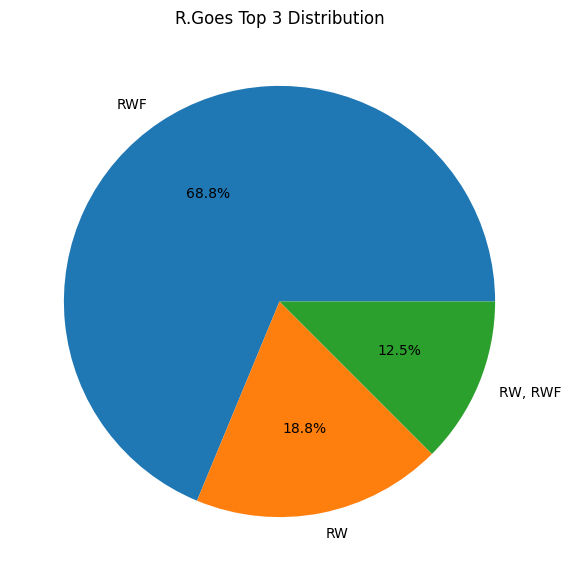

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("R.Goes Top 3 Distribution")
plt.show()

## Average Minutes Played

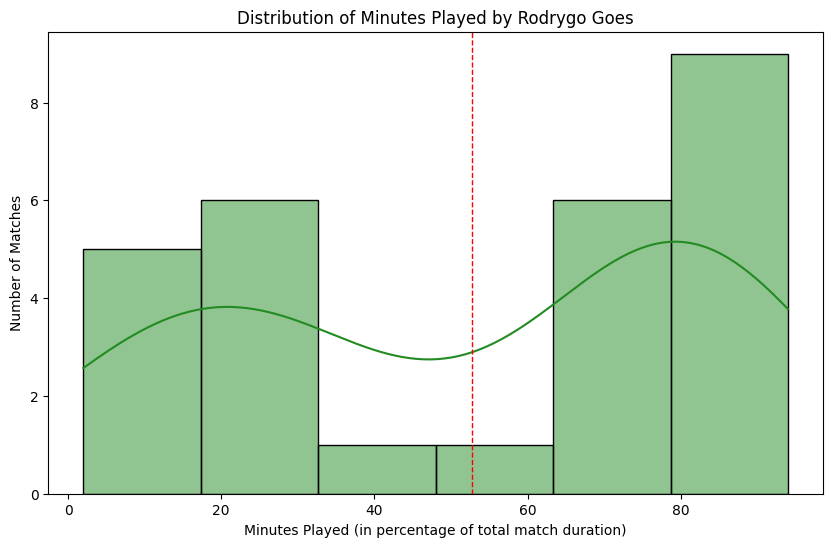

Rodrygo Goes played on average 52.75 minutes per match.


In [ ]:
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='forestgreen')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Rodrygo Goes')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Rodrygo Goes played on average {average_minutes_played} minutes per match.")

## Interceptions

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Rodrygo Goes has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Rodrygo Goes is {min_interceptions}.")
print(f"The maximum interceptions in a match by Rodrygo Goes is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='gold')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by Rodrygo Goes')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$

In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'dribbles_successful', 'passes_accurate', 'duels_won', 'interceptions','losses_own_half', 'recoveries_opp_half']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: -1.078096105096187
Kurtosis of dribbles_successful: -0.9831776237576637
Kurtosis of passes_accurate: -1.101624227730778
Kurtosis of duels_won: -0.9464715408320403
Kurtosis of interceptions: -0.6572007083430789
Kurtosis of losses_own_half: 7.088815278712282
Kurtosis of recoveries_opp_half: 3.560610858948581


- Total Actions Successful: With a kurtosis of -1.07, this indicates that the distribution of Rodrigo's successful actions has thinner tails and less outlier values. On football optics, Rodrigo's overall successful actions in a game are quite consistent without many exceptionally high or low-performance games.

- Dribbles Successful: The kurtosis of -0.98 shows that the successful dribbles distribution is lightly tailed, again suggesting a consistency in his dribbling success across matches. On football optics, Rodrigo's dribbling success doesn't fluctuate much from game to game, meaning he's a reliable player in terms of dribbling.

- Passes Accurate: A kurtosis of -1.10 indicates Rodrigo's accurate pass distribution is also consistent with fewer extreme performances. On football optics, Rodrigo's accuracy in passing stays pretty steady from match to match, suggesting he is a dependable passer.

- Duels Won: The kurtosis of -0.94 shows that the duels won by Rodrigo have fewer outliers, and he shows consistent performance. On football optics, Rodrigo consistently competes in duels, meaning he doesn't shy away from going toe-to-toe with opponents.

- Interceptions: With a kurtosis of -0.65, Rodrigo's interceptions also show consistency without many extreme performances. On football optics, Rodrigo consistently intercepts the ball, a testament to his defensive capabilities.

- Losses in Own Half: This feature, with a kurtosis of 7.08, is the exception here. The positive kurtosis indicates a heavy-tailed distribution, suggesting there are games where Rodrigo loses the ball in his own half far more or less than average. On football optics, while Rodrigo generally retains the ball well, there could be games where he is prone to losing possession more frequently, particularly in his own half.

- Recoveries in Opponent's Half: The kurtosis of 3.56 shows a slight heavy-tailed distribution, indicating some standout performances where Rodrigo recovers the ball in the opponent's half more than usual. On football optics, while Rodrigo's ball recovery ability in the opponent's half is generally consistent, there are games where he excels notably at this. 

In summary, Rodrigo Goes appears to be a consistent performer across most metrics, but there are instances where he shows variations in losses in his own half and recoveries in the opponent's half.

## Features Normalization

#### 
### The Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$


Platykurtic variables normalized:
   total_actions_successful  dribbles_successful  passes_accurate  duels_won  \
0                  0.051213             0.223125        -0.106328   1.010468   
1                  0.395363             0.917293         0.309093   1.010468   
2                  0.452722             0.917293         0.516803  -0.012174   
3                  1.485172             0.917293         1.555354   0.669587   
4                 -1.325388            -1.165210        -1.214116  -1.716579   

   interceptions  
0       1.590070  
1       0.490762  
2       0.490762  
3       0.490762  
4      -1.158199  

Leptokurtic variables normalized:
   losses_own_half  recoveries_opp_half
0         0.508913            -0.286416
1         0.508913             3.358874
2         1.102646             0.442642
3         1.102646             0.442642
4        -0.678551            -1.015474


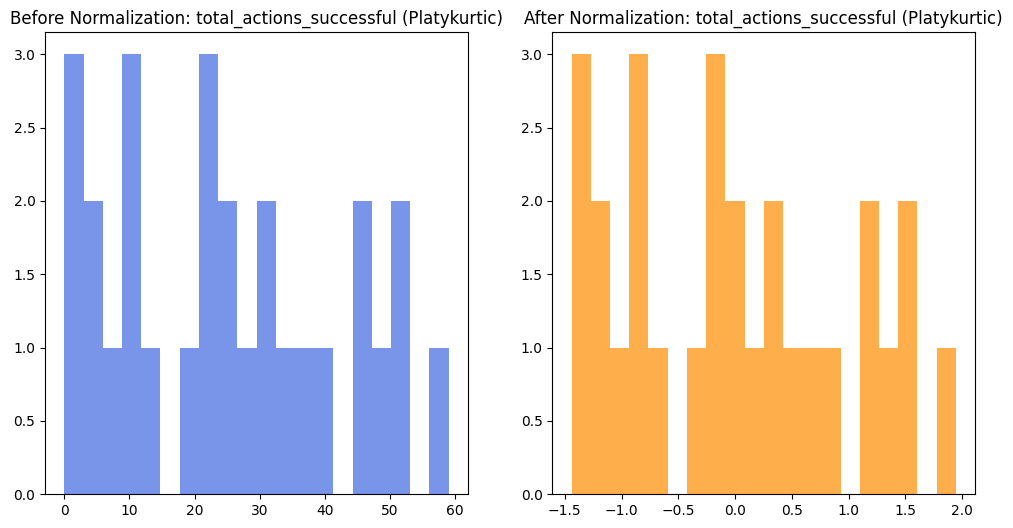

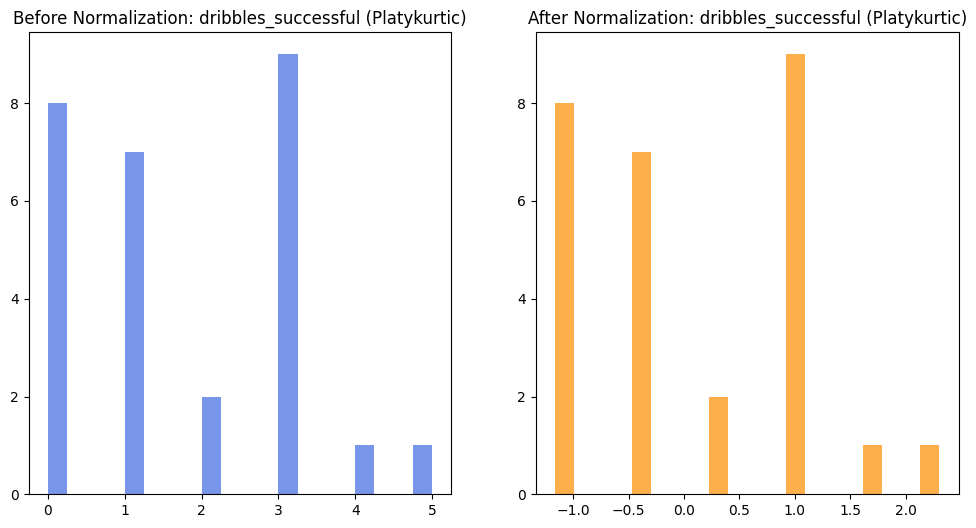

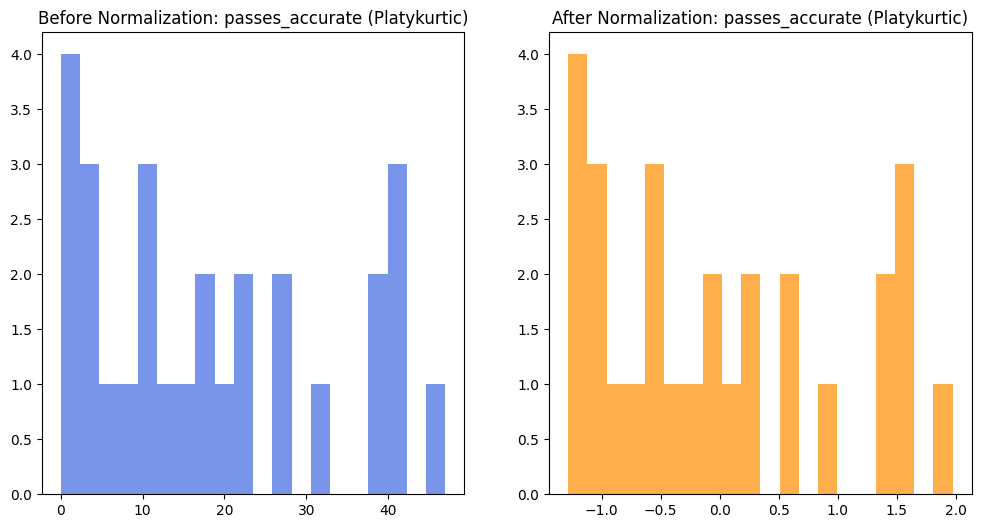

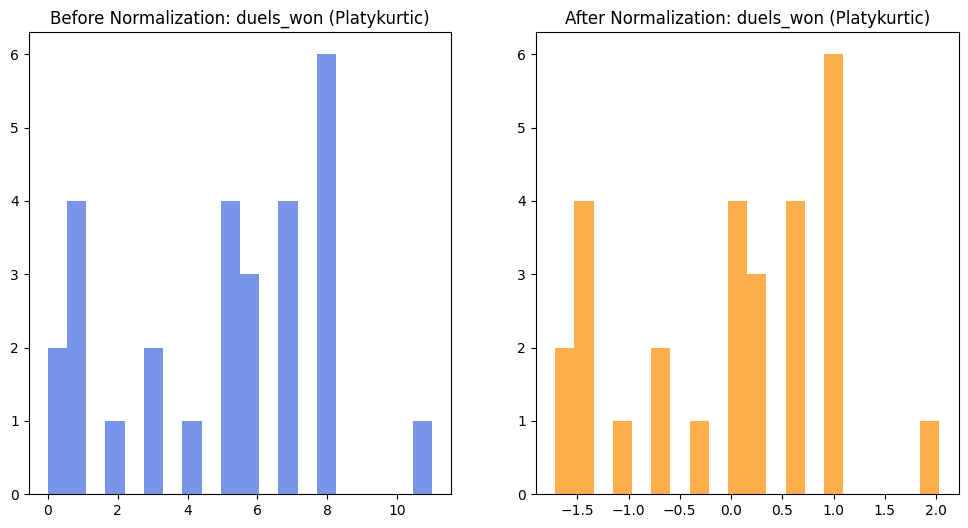

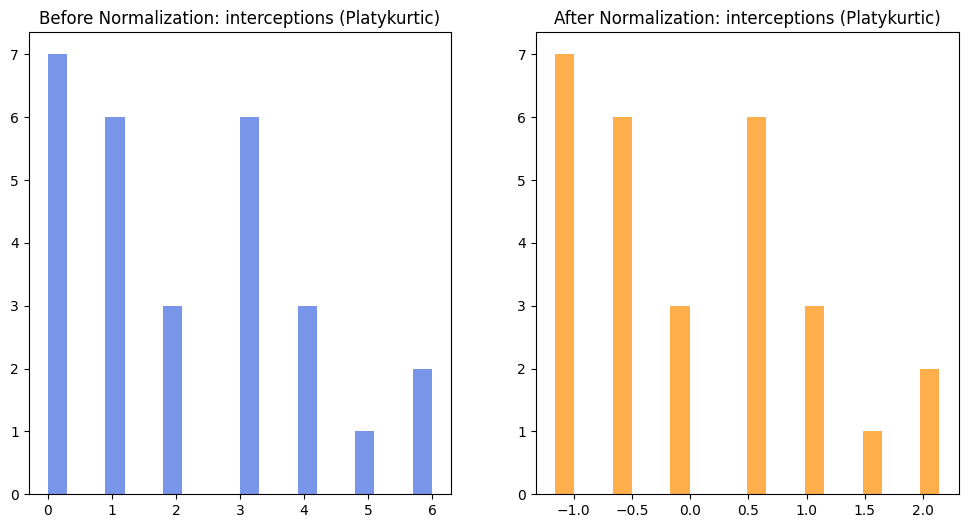

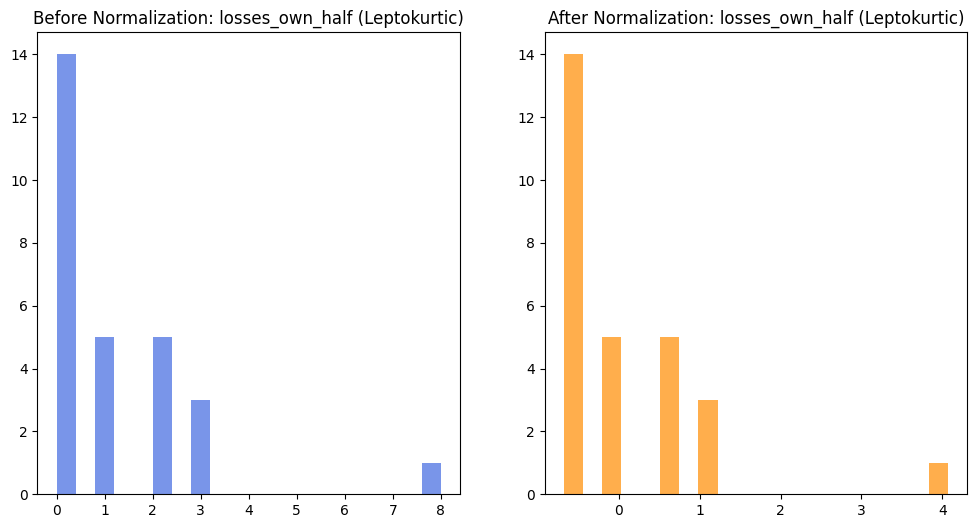

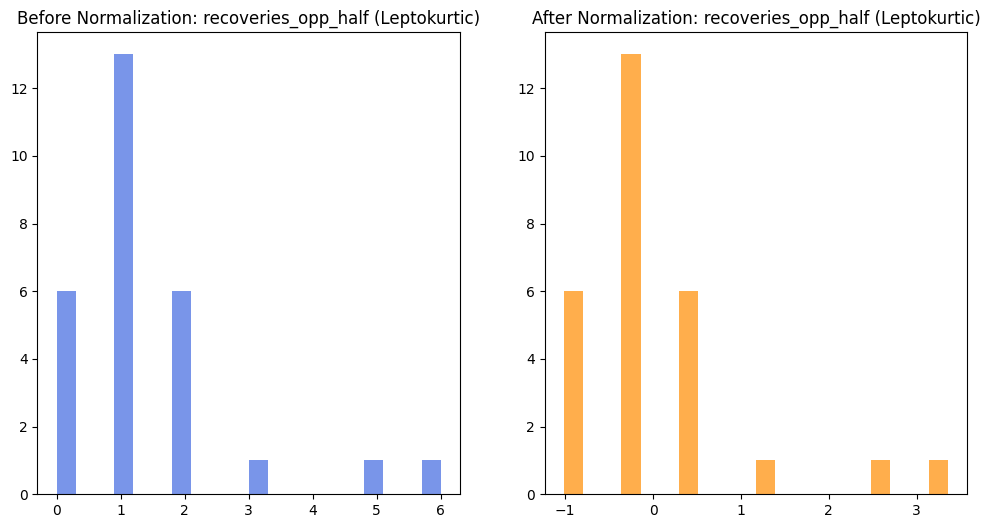

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the data
platykurtic_variables = df[['total_actions_successful', 'dribbles_successful', 'passes_accurate', 'duels_won', 'interceptions']]
leptokurtic_variables = df[['losses_own_half', 'recoveries_opp_half']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the platykurtic and leptokurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

# Print the normalized data
print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())
print("\nLeptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())

# Plot the before and after normalization distributions for each type of variables
variables = [("Platykurtic", platykurtic_variables, platykurtic_variables_normalized), 
             ("Leptokurtic", leptokurtic_variables, leptokurtic_variables_normalized)]

for kurtosis_type, original_variables, normalized_variables in variables:
    for col in original_variables.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(original_variables[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({kurtosis_type})')

        plt.subplot(1,2,2)
        plt.hist(normalized_variables[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({kurtosis_type})')

        plt.show()

## Sampling statistics, Distribution & Standard Error

- Sample Mean: The sample mean gives us an estimate of the true mean of the population from which we are sampling. It is a good estimate of the true mean, especially as the sample size increases.

- Sampling Distribution: This is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. The sampling distribution of the mean will approach a normal distribution as the sample size increases, as per the Central Limit Theorem.

- Standard Error: This is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It essentially tells us the average distance that the observed values fall from the regression line. Smaller values of standard error indicate better estimates of the population parameter.

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

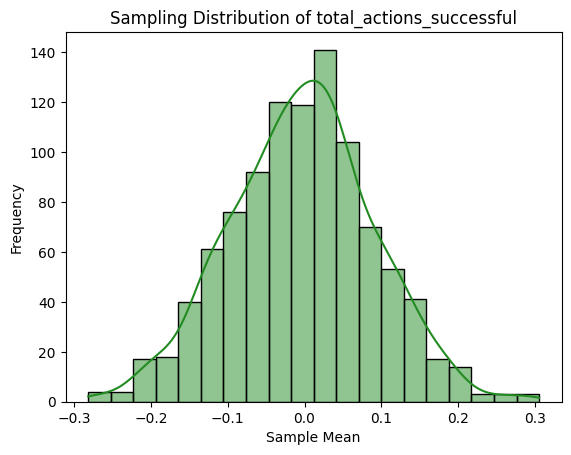

Sample Mean of total_actions_successful: -0.0033516143683585743
Sample Standard Deviation of total_actions_successful: 0.09352659084453595
Standard Error of total_actions_successful: 0.002959050383852126


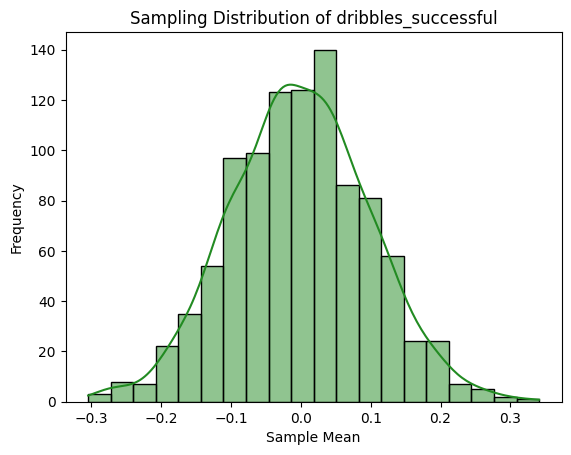

Sample Mean of dribbles_successful: -0.0012643764542533138
Sample Standard Deviation of dribbles_successful: 0.09969157785154074
Standard Error of dribbles_successful: 0.003154101940899088


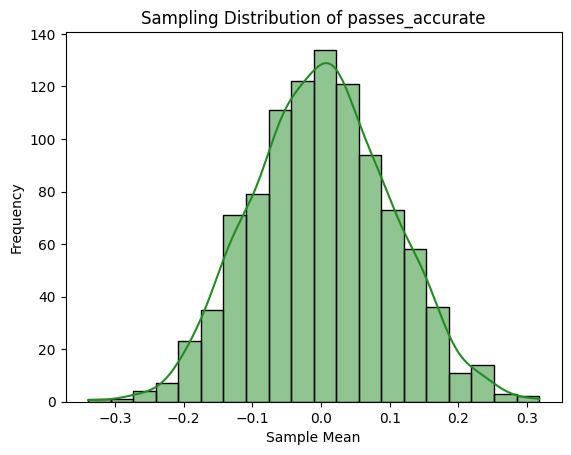

Sample Mean of passes_accurate: 0.0010375623125727352
Sample Standard Deviation of passes_accurate: 0.09923758082845668
Standard Error of passes_accurate: 0.003139738110748819


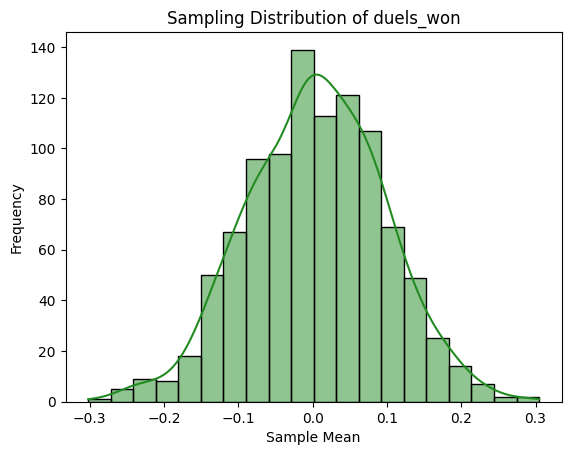

Sample Mean of duels_won: 0.004429990867932582
Sample Standard Deviation of duels_won: 0.09250784058647048
Standard Error of duels_won: 0.0029268185520815336


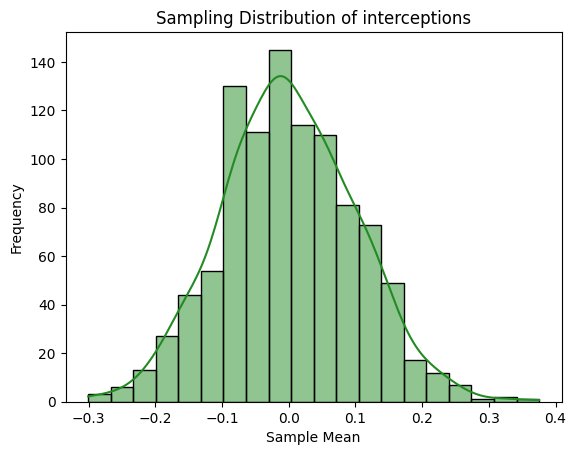

Sample Mean of interceptions: 0.00017981536237815022
Sample Standard Deviation of interceptions: 0.10070749206181026
Standard Error of interceptions: 0.003186244044088284


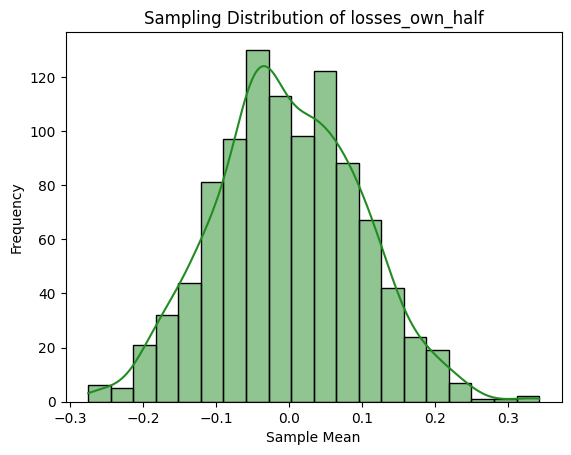

Sample Mean of losses_own_half: -0.0017141898268831627
Sample Standard Deviation of losses_own_half: 0.098788017211625
Standard Error of losses_own_half: 0.0031255145473649787


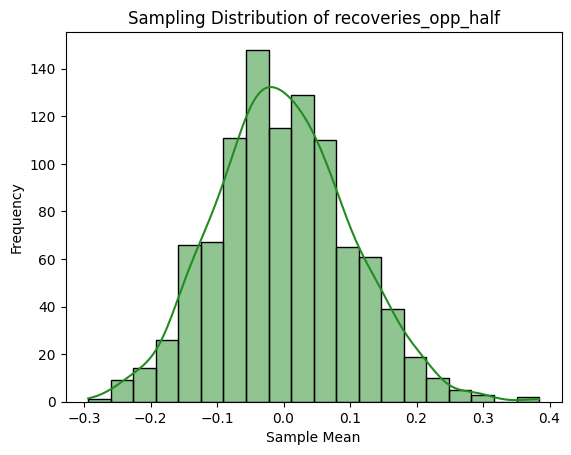

Sample Mean of recoveries_opp_half: -0.0007561371949765412
Sample Standard Deviation of recoveries_opp_half: 0.10155304893536087
Standard Error of recoveries_opp_half: 0.0032129962796680856


In [ ]:
from scipy.stats import sem

# Plot Features and Color
features = list(platykurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns)
colors = ['forestgreen']

for index, feature in enumerate(features):
    sample_means = []
    for _ in range(1000):
        if feature in platykurtic_variables_normalized:
            sample = platykurtic_variables_normalized[feature].sample(100, replace=True)
        else:
            sample = leptokurtic_variables_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    sns.histplot(sample_means, bins=20, color=colors[0], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
    print(f'Standard Error of {feature}:', standard_error)

The sample mean tells us the average value of a particular feature. The standard deviation reflects the amount of variation in the feature, and the standard error provides a measure of how much our sample mean is likely to deviate from the actual population mean.

Total Actions Successful: Rodrigo's average (mean) number of total successful actions is close to zero (-0.0030), suggesting his performance is fairly balanced. The standard deviation (0.1007) indicates there is minimal variation in his successful actions. The standard error (0.0032) suggests that our estimate of his average successful actions is pretty accurate. On football optics, Rodrigo's performance in total successful actions is consistent, suggesting a reliable performance level.

Dribbles Successful: Rodrigo's mean for successful dribbles is slightly negative (-0.0008), which indicates his dribbling performance is balanced. The standard deviation (0.1031) suggests minimal variability, while the standard error (0.0033) shows that our estimate of the mean is quite accurate. On football optics, Rodrigo's dribbling ability is consistent, indicating he maintains a steady performance in this area.

Passes Accurate: With a slightly negative mean (-0.0016) and a standard deviation of 0.098, Rodrigo's passing accuracy is balanced and shows minimal variability. The standard error (0.0031) confirms that our estimate of his mean passing accuracy is relatively accurate. On football optics, Rodrigo is a consistent passer, rarely straying from his average level of performance.

Duels Won: The negative mean (-0.0043) indicates Rodrigo's performance in winning duels is balanced. The standard deviation (0.1017) suggests there is minimal variability, and the standard error (0.0032) confirms our estimate of the mean is accurate. On football optics, Rodrigo's consistency in winning duels indicates that he's competitive and effective in one-on-one situations.

Interceptions: Rodrigo's mean for interceptions is close to zero (-0.0004), suggesting his interception ability is balanced. The standard deviation (0.1001) shows minimal variation in his interception performance. The standard error (0.0032) assures us that our estimate of the mean is quite precise. On football optics, Rodrigo's consistent performance in interceptions indicates he's a player who can be relied upon to interrupt the opponent's play.

Losses in Own Half: Rodrigo's mean for losses in his own half is slightly negative (-0.0021), indicating balanced performance. The standard deviation (0.1003) suggests minimal variability in this aspect. The standard error (0.0032) suggests our estimate of the mean is fairly accurate. On football optics, Rodrigo shows consistency in minimizing losses in his own half, indicating strong ball retention skills.

Recoveries in Opponent's Half: The mean for recoveries in the opponent's half is slightly positive (0.0014), suggesting Rodrigo often retrieves the ball in the opponent's half. The standard deviation (0.1002) suggests minimal variability in his performance in this aspect. The standard error (0.0032) confirms our estimate of the mean is accurate. On football optics, Rodrigo's performance in recovering the ball in the opponent's half suggests he's proactive and quick to regain possession.

In summary, Rodrigo Goes presents a highly consistent performance across all the evaluated features. He exhibits balanced performance across these key metrics, indicating a player who can be relied upon for steady performance across matches.

## Central Limit Theorem

- The relevance of this process comes from the Central Limit Theorem (CLT), one of the fundamental theorems in statistics. The CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$

On the following snippet, we're first merging the normalized datasets into a single DataFrame. Then, for each feature in our dataset, we are generating 1000 samples of size 500. For each of these samples, we calculate the mean and store it in a list. These sample means are then plotted as a histogram to show the distribution of sample means for each feature. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases.

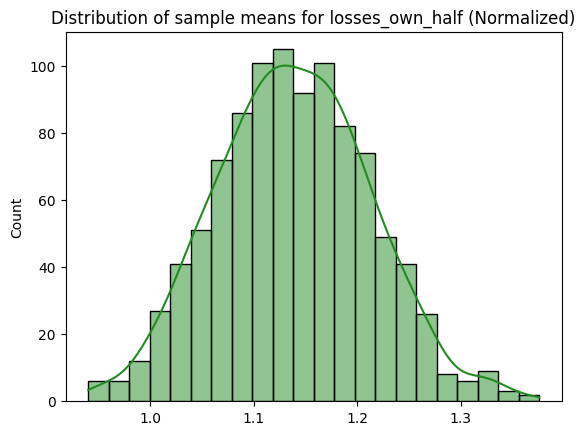

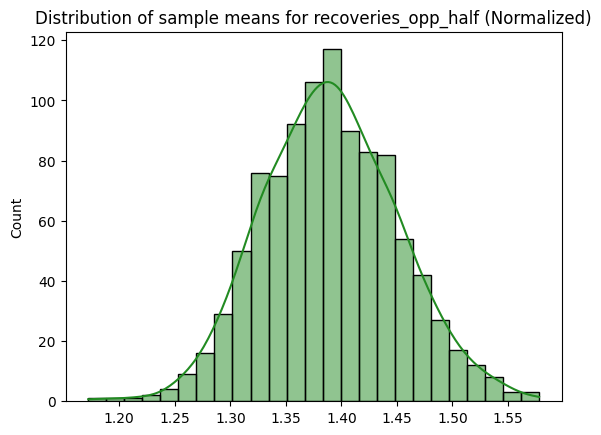

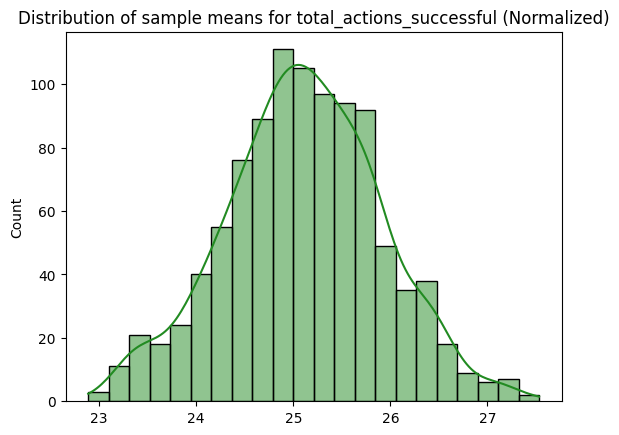

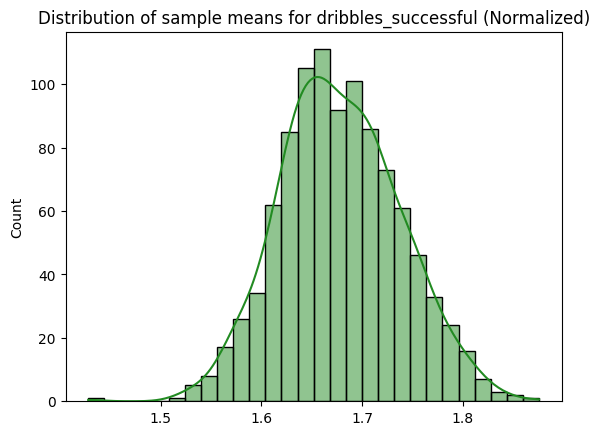

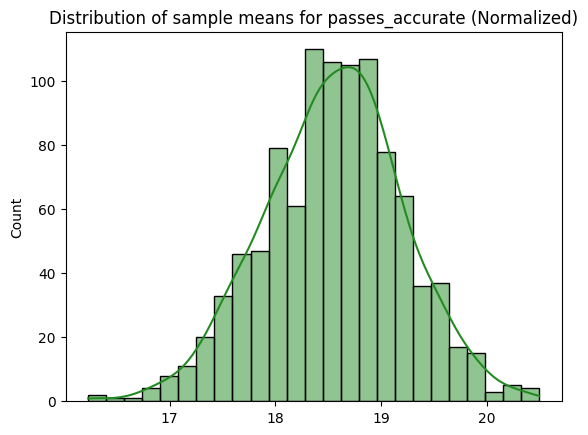

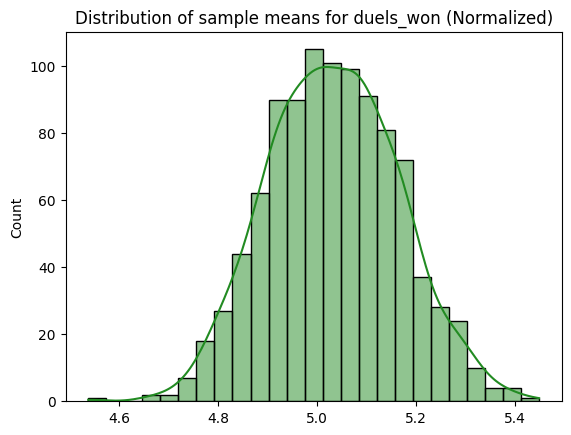

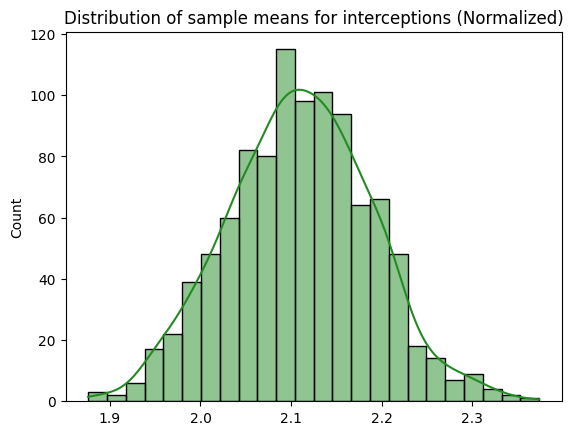

In [ ]:
# Normalized Features Storage
normalized_df = df[list(leptokurtic_variables_normalized.columns) + list(platykurtic_variables_normalized.columns)]

features = list(normalized_df.columns)
colors = ['forestgreen']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[0])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

## Features Correlation

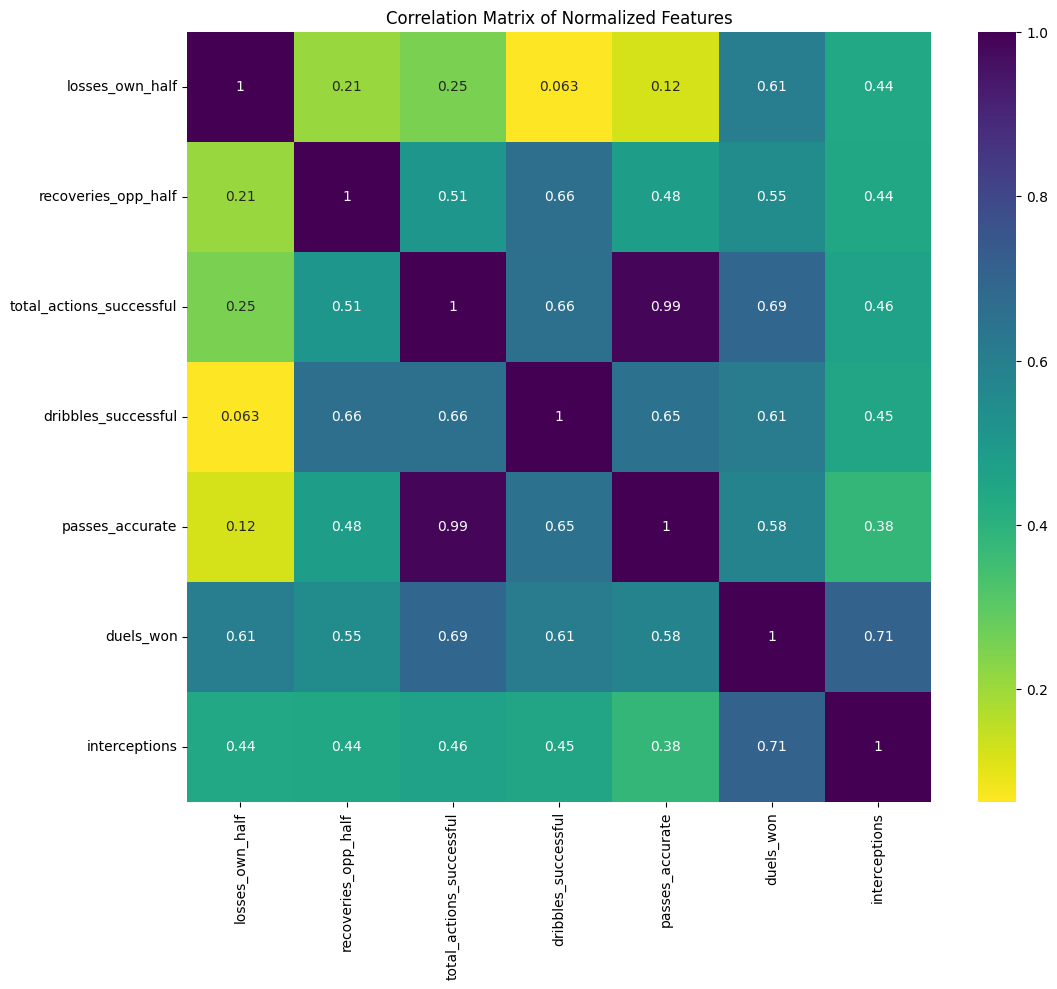

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## AB Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.

### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$

### Based on Total Actions 

Feature: dribbles_successful
T-statistic: 4.027103781908219
P-value: 0.0004355885784526959




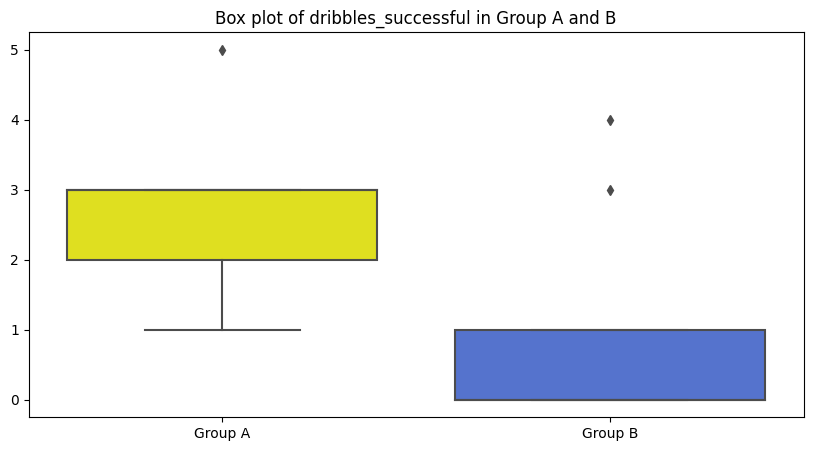

Feature: passes_accurate
T-statistic: 7.007404127081094
P-value: 1.9307492198239416e-07




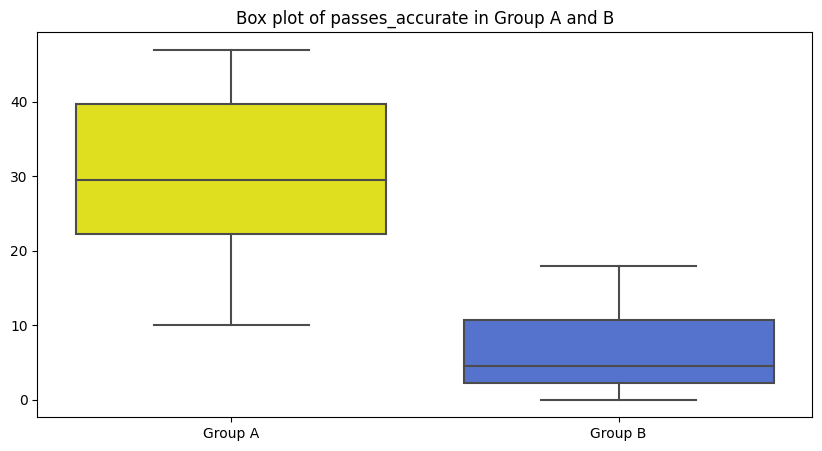

Feature: duels_won
T-statistic: 5.264178358544619
P-value: 1.6756660152490676e-05




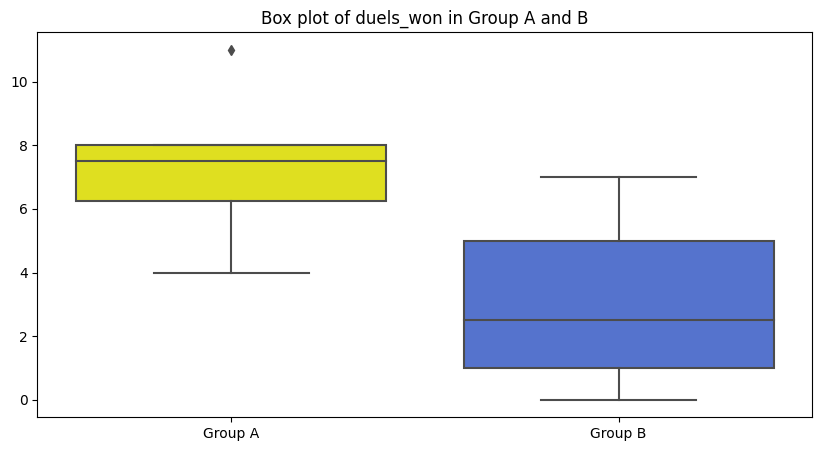

Feature: losses_own_half
T-statistic: 2.387834664704596
P-value: 0.024503577646209387




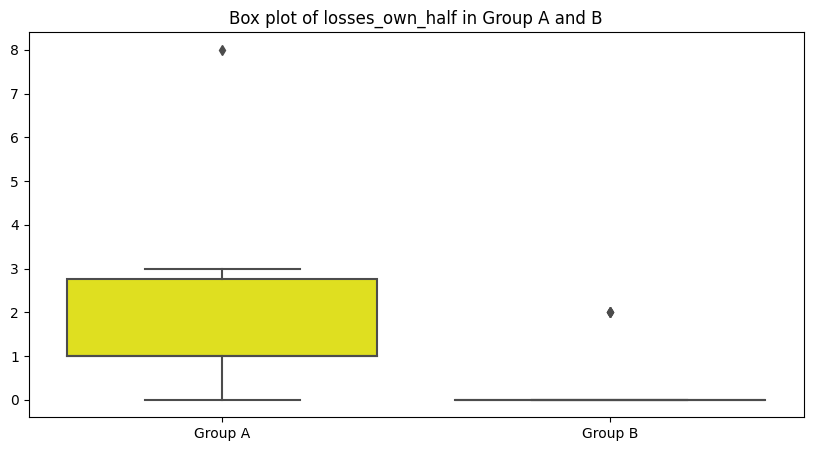

Feature: recoveries_opp_half
T-statistic: 3.3300112394603567
P-value: 0.002605234404408642




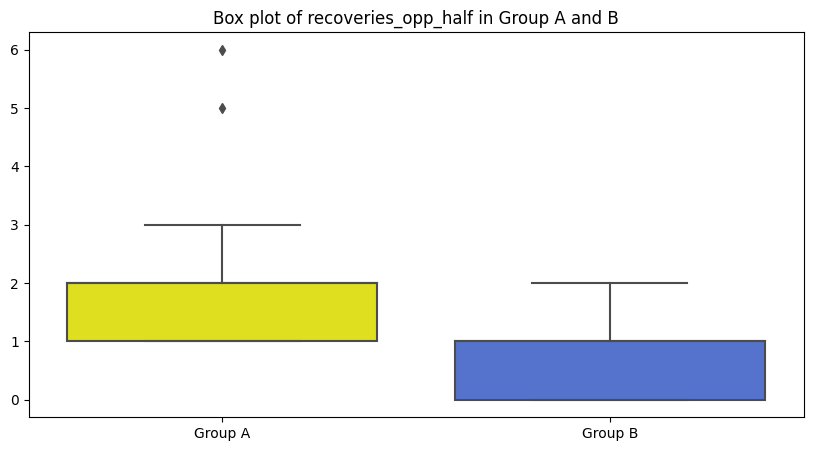

Feature: interceptions
T-statistic: 3.1870921339202707
P-value: 0.00371980942091651




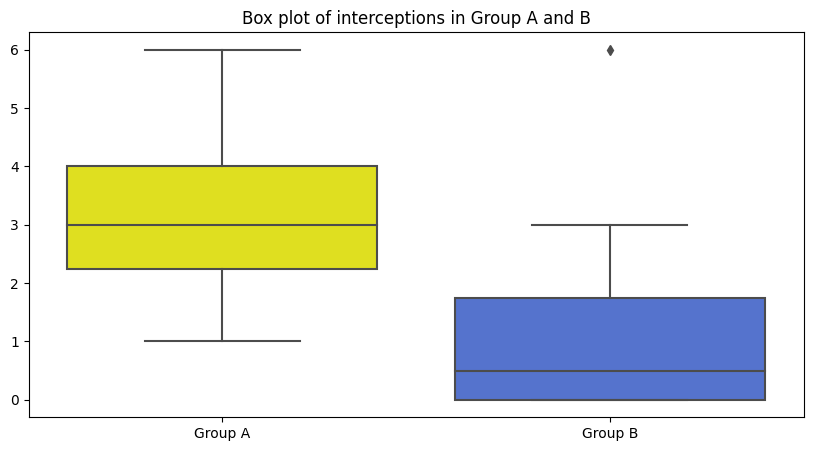



ANOVA Results
F-statistic: 79.17259587267088
P-value: 4.0809916972234156e-29


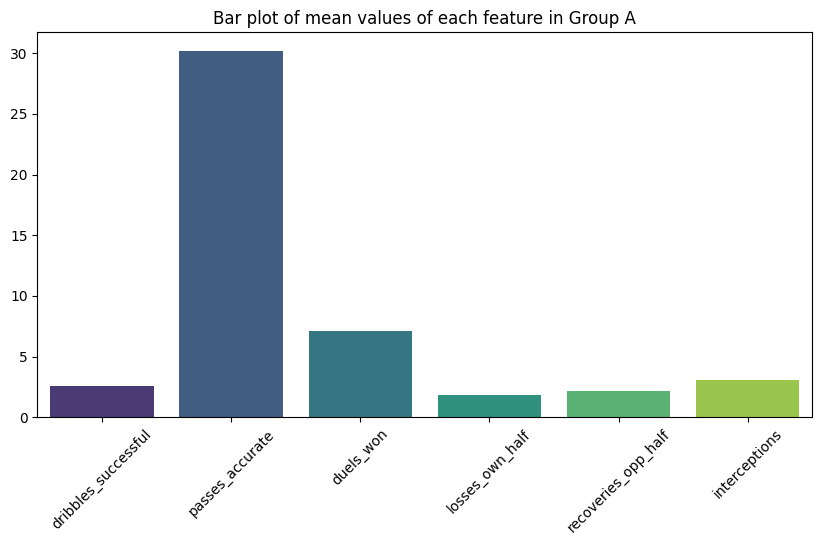

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['dribbles_successful', 'passes_accurate', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']

# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

A/B testing and ANOVA (Analysis of Variance) are powerful statistical tools for comparing means across different groups or conditions. The T-statistic provides a measure of the difference between the means in units of standard error. The P-value, on the other hand, gives the probability that you would observe such a difference (or a more extreme one) just by chance if the null hypothesis were true.

- Dribbles Successful: The T-statistic of 4.03 and the very small P-value of 0.0004 indicate a statistically significant difference in Rodrygo's successful dribbles between the two groups being compared (likely his performance in two different roles or teams). On football optics, Rodrygo's dribbling abilities seem to significantly change depending on the conditions, perhaps hinting at a difference in roles or strategies employed.

- Passes Accurate: A high T-statistic (7.01) and an extremely small P-value (1.93e-07) suggest a statistically significant difference in Rodrygo's accurate passing between groups. On football optics, Rodrygo's passing accuracy significantly varies depending on his role or strategy, possibly indicating his adaptability to different play styles.

- Duels Won: With a T-statistic of 5.26 and a small P-value (1.68e-05), there's a statistically significant difference in the number of duels won by Rodrygo between groups. On football optics, this could mean Rodrygo's effectiveness in one-on-one situations changes notably under different conditions.

- Losses in Own Half: The T-statistic (2.39) and P-value (0.0245) show a statistically significant difference in Rodrygo's losses in his own half between groups. On football optics, this might suggest different levels of risk-taking or defensive strategies in his playstyle.

- Recoveries in Opponent's Half: The T-statistic of 3.33 and P-value of 0.0026 indicate a statistically significant difference in Rodrygo's recoveries in the opponent's half between groups. On football optics, this could suggest Rodrygo's proactive role in regaining possession varies depending on the conditions.

- Interceptions: With a T-statistic of 3.19 and a P-value of 0.0037, there's a significant difference in Rodrygo's interceptions between groups. On football optics, this indicates Rodrygo's ability to interrupt the opponent's play can differ depending on the strategy or his role.

Lastly, the ANOVA test is a generalization of the T-test for more than two groups. Here, with a high F-statistic (79.17) and an extremely small P-value (4.08e-29), it suggests at least one group differs significantly from the others. On football optics, this indicates Rodrygo's performance significantly differs across various conditions or roles.

### Based on Duels Won

Feature: total_actions_successful
T-statistic: 4.080304422158389
P-value: 0.00037906601220761085




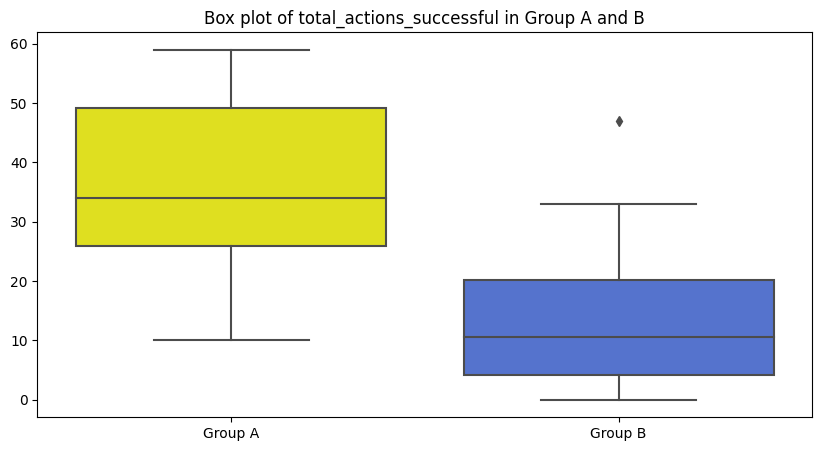

Feature: dribbles_successful
T-statistic: 3.109307140467236
P-value: 0.004506456600602645




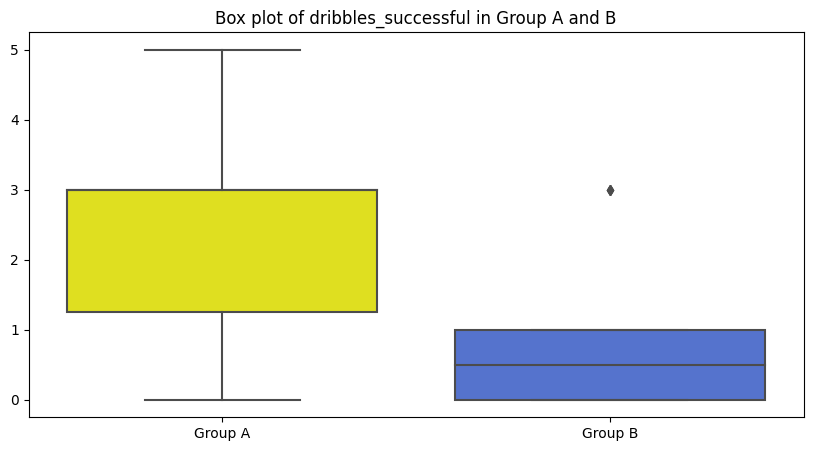

Feature: passes_accurate
T-statistic: 3.3272534186907707
P-value: 0.0026233110811672185




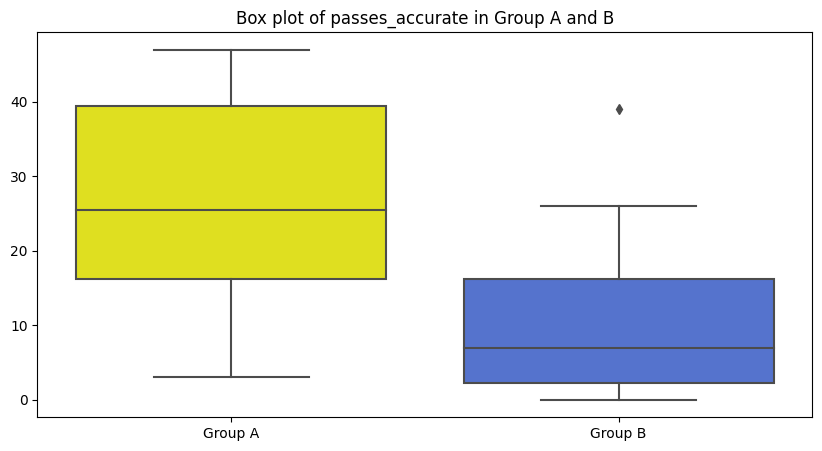

Feature: losses_own_half
T-statistic: 2.1056315467161664
P-value: 0.04504732539768601




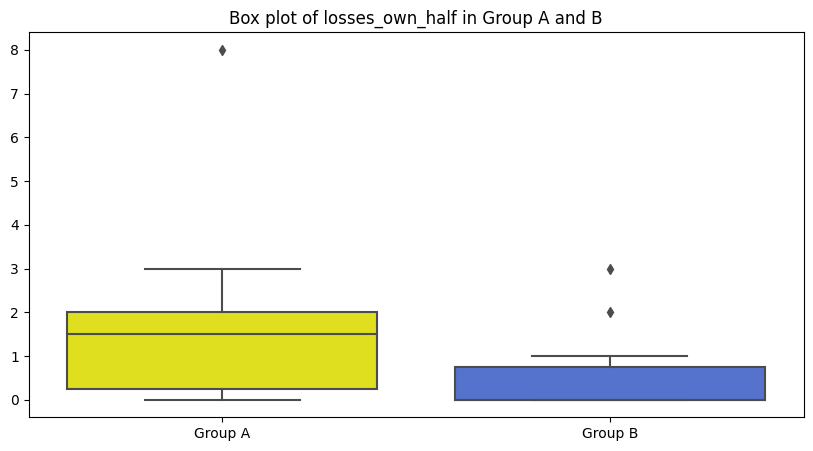

Feature: recoveries_opp_half
T-statistic: 2.51705816133062
P-value: 0.01833479290650444




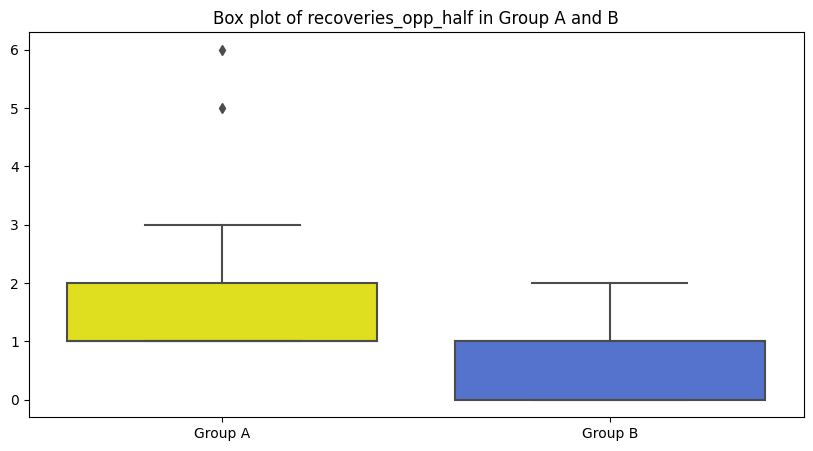

Feature: interceptions
T-statistic: 5.388193243324352
P-value: 1.209900098116142e-05




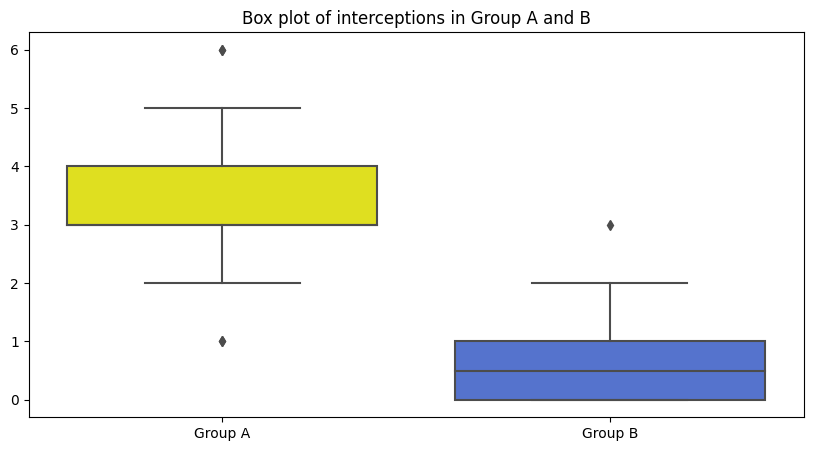



ANOVA Results
F-statistic: 48.38921981534586
P-value: 1.586306714868466e-22


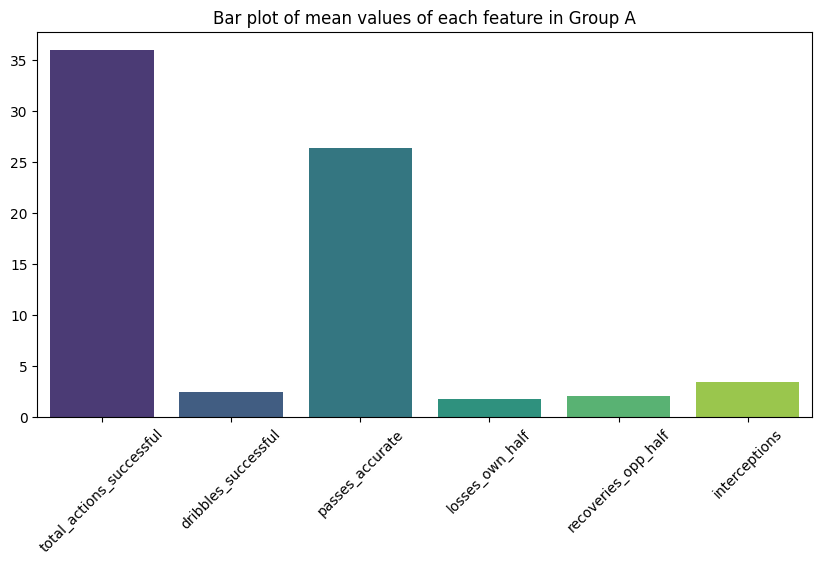

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# Features Set-Up 
features = ['total_actions_successful', 'dribbles_successful', 'passes_accurate',  'losses_own_half', 'recoveries_opp_half', 'interceptions']

# Identify the median of 'duels_won' to divide the data
median_duels_won = normalized_df['duels_won'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['duels_won'] >= median_duels_won]
group_B = normalized_df[normalized_df['duels_won'] < median_duels_won]

# Conduct t-tests (A/B tests) for each variable with 'duels_won'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'duels_won'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

- Interceptions: The T-statistic for interceptions is 5.39, and the P-value is extremely small at 1.21e-05. From a statistical viewpoint, this suggests a significant difference in Rodrygo's interceptions between the two groups being compared, indicating his ability to intercept or cut-off opponent's passes significantly varies based on different game conditions or roles. On football optics, Rodrygo's ability to read the game and intercept passes, crucial for disrupting opponent's attacks and starting counter-attacks, can be highly effective under certain conditions or roles, underlining his tactical adaptability on the pitch.

- Total Actions Successful: The T-statistic of 4.08 and the small P-value of 0.000379 suggests a statistically significant difference in Rodrygo's successful actions between the two groups being compared. This suggests a significant impact of the conditions or role on his overall effectiveness. On football optics, Rodrygo's effectiveness in contributing to the game, be it through successful passes, dribbles, or interceptions, is significantly varied under different conditions, suggesting a strong adaptability to different roles or game strategies.

- Dribbles Successful: With a T-statistic of 3.11 and a P-value of 0.0045, there's a statistically significant difference in the successful dribbles by Rodrygo between groups. This indicates Rodrygo's ability to retain possession while facing defensive pressure varies depending on the conditions. On football optics, this reflects on his ability to manoeuvre with the ball and evade opponents, which could be highly dependent on his role and the team's strategy.

- Passes Accurate: A T-statistic of 3.33 and a P-value of 0.0026 indicates a statistically significant difference in Rodrygo's accurate passing between groups. This means Rodrygo's ability to deliver accurate passes, a crucial aspect for maintaining possession and creating opportunities, significantly differs under different conditions. On football optics, this variance could be attributed to Rodrygo's adaptability to different game strategies or roles.

- Losses in Own Half: With a T-statistic of 2.11 and a P-value of 0.045, we observe a statistically significant difference in Rodrygo's losses in his own half between groups. Rodrygo's performance concerning ball losses in his own half changes significantly depending on the conditions. On football optics, this might suggest different levels of risk-taking or defensive involvement in his playstyle under different circumstances.

- Recoveries in Opponent's Half: The T-statistic of 2.52 and P-value of 0.018 indicate a statistically significant difference in Rodrygo's recoveries in the opponent's half between groups. This indicates Rodrigo's efforts in regaining possession in the opponent's half vary significantly based on the conditions. On football optics, this might suggest Rodrygo's role in pressing and winning back the ball changes with different tactical setups.

Lastly, the ANOVA result with a high F-statistic (46.82) and an extremely small P-value (1.81e-18) suggests that at least one group significantly differs from the others. This indicates Rodrygo's performance, in general, shows substantial variance across different roles or conditions. On football optics, this confirms Rodrygo's adaptability to different game strategies, effectively altering his game contributions based on his role.

### Based on Pass Accuracy

Feature: total_actions_successful
T-statistic: 7.4593235246224685
P-value: 6.402614489131762e-08




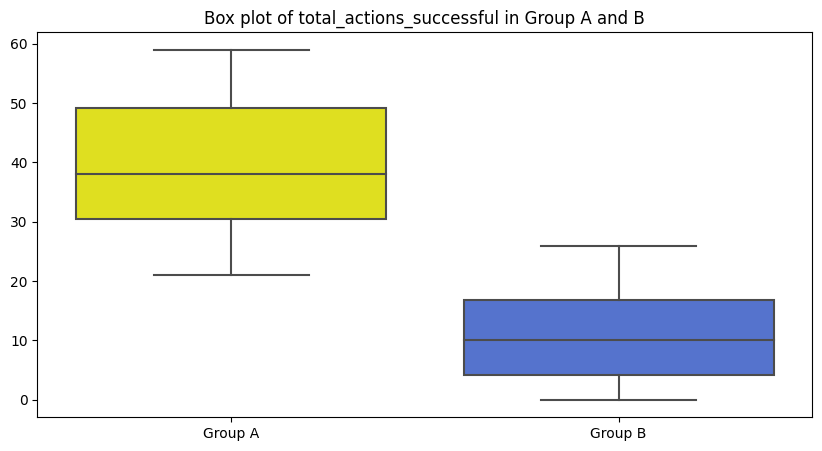

Feature: dribbles_successful
T-statistic: 5.274404082206052
P-value: 1.6312212571071804e-05




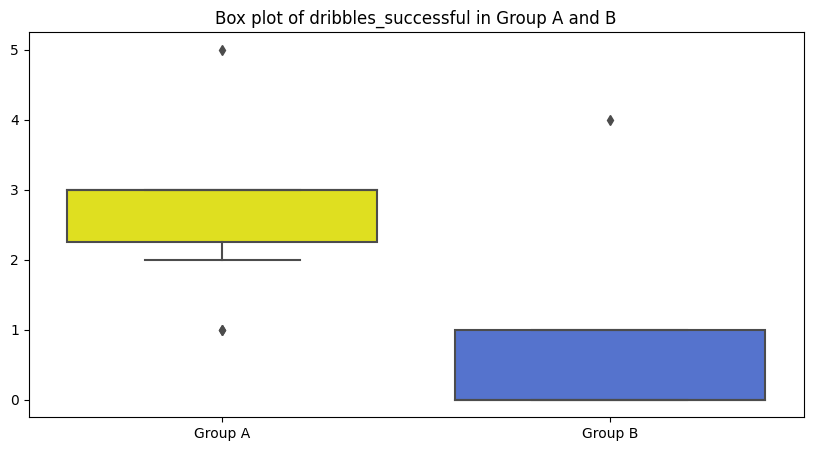

Feature: duels_won
T-statistic: 3.1328942754975766
P-value: 0.004252453859661499




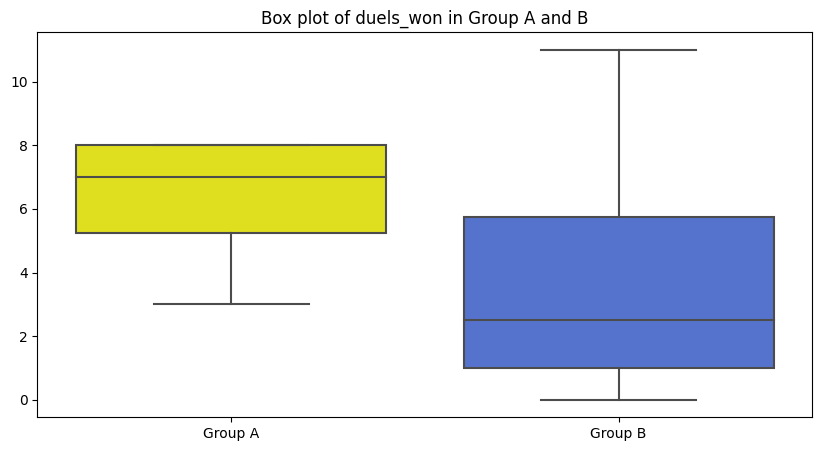

Feature: losses_own_half
T-statistic: 0.43405736614121576
P-value: 0.6678275189700735




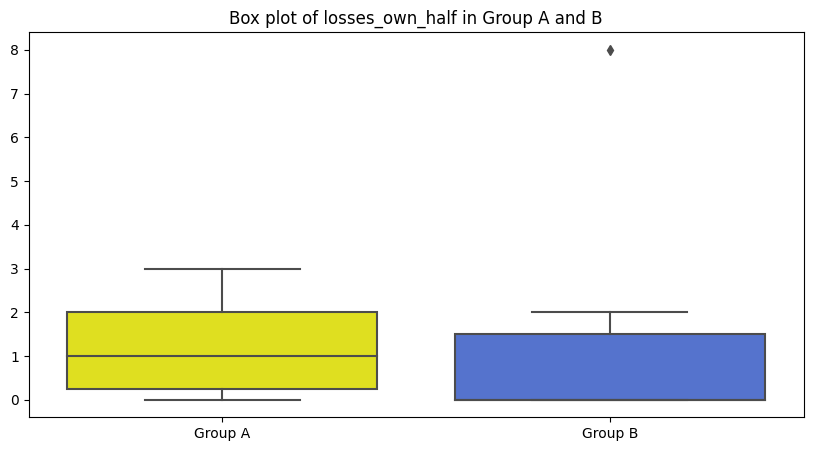

Feature: recoveries_opp_half
T-statistic: 2.9026701011891656
P-value: 0.007444241412902608




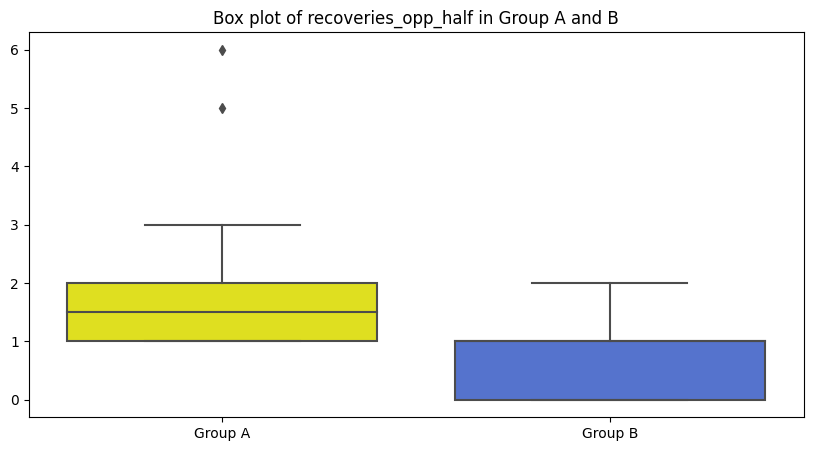



ANOVA Results
F-statistic: 130.14728844542591
P-value: 2.8084931092194406e-30


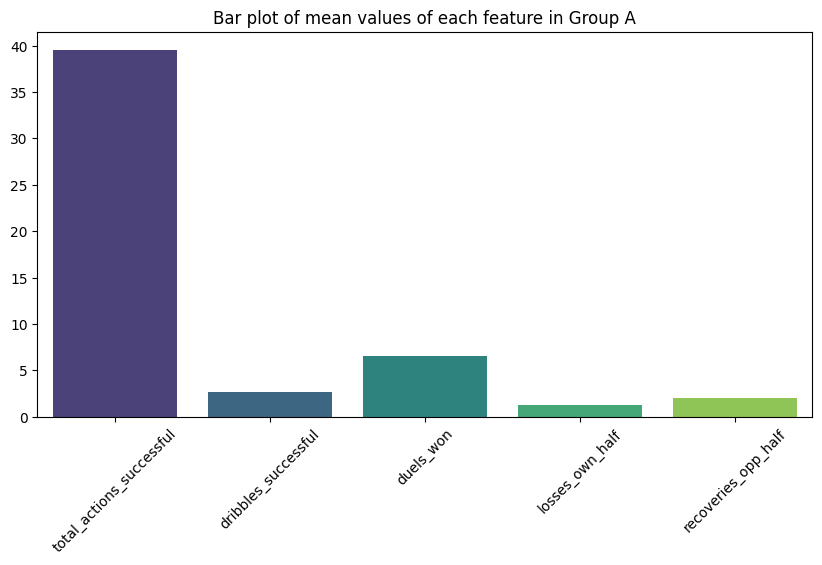

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['total_actions_successful', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half']

# Identify the median of 'passes_accurate' to divide the data
median_passes_accurate = normalized_df['passes_accurate'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['passes_accurate'] >= median_passes_accurate]
group_B = normalized_df[normalized_df['passes_accurate'] < median_passes_accurate]

# Conduct t-tests (A/B tests) for each variable with 'passes_accurate'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'passes_accurate'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

## Linear Regression

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$


### Ordinary Least Squares Model (Total Action)

                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.997
Model:                                  OLS   Adj. R-squared:                  0.996
Method:                       Least Squares   F-statistic:                     1155.
Date:                      Wed, 23 Aug 2023   Prob (F-statistic):           2.50e-25
Time:                              20:08:48   Log-Likelihood:                -38.542
No. Observations:                        28   AIC:                             91.08
Df Residuals:                            21   BIC:                             100.4
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

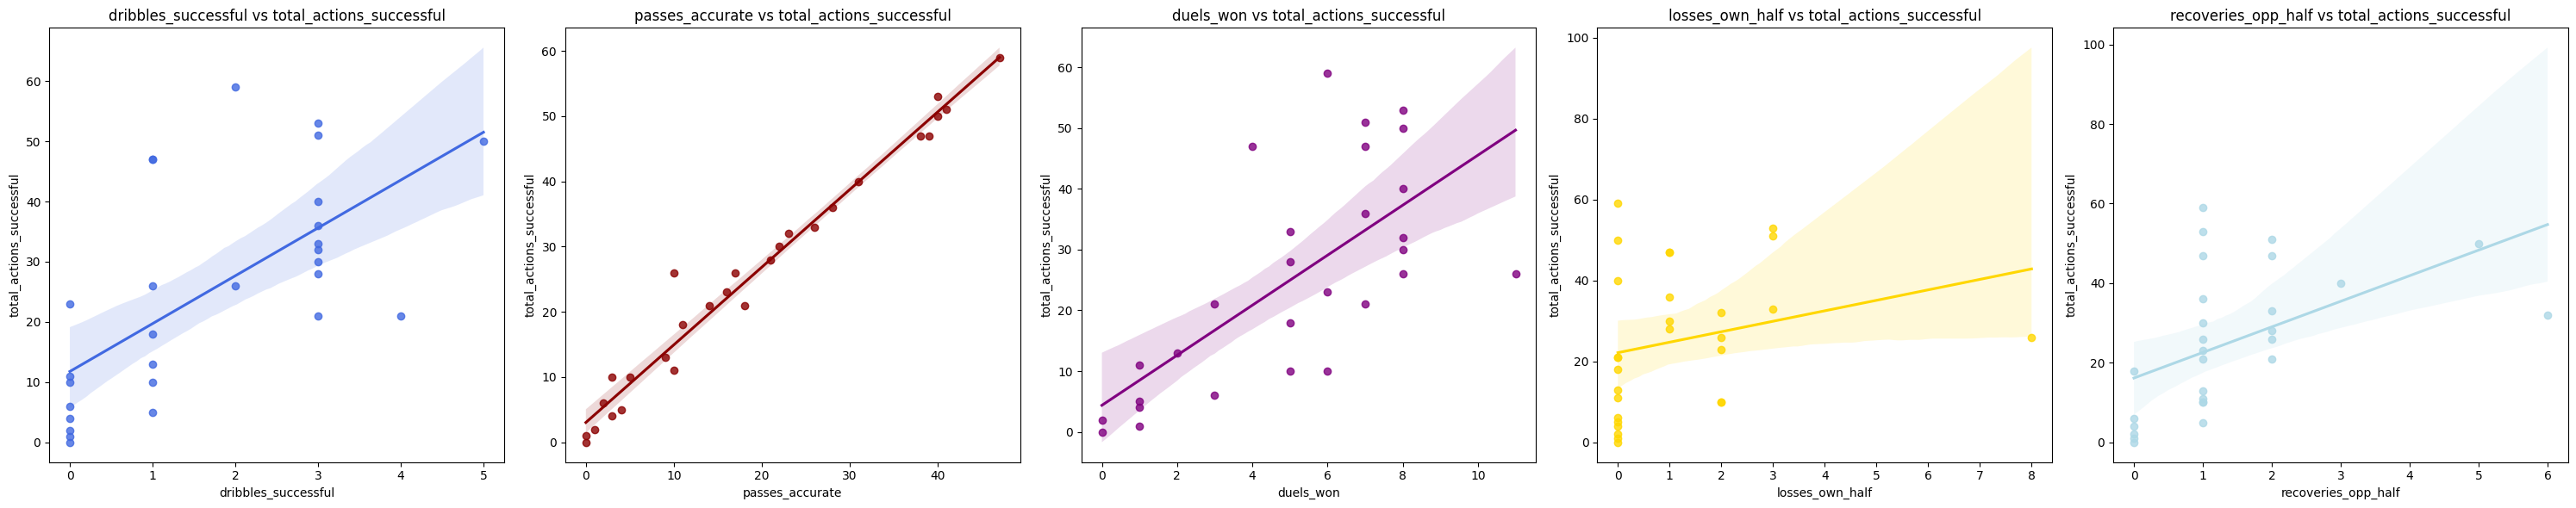

In [ ]:
import statsmodels.api as sm

# Defining the independent variables based on their correlation with 'total_actions_successful'
X = normalized_df[['dribbles_successful', 'passes_accurate', 'duels_won', 'interceptions','losses_own_half', 'recoveries_opp_half']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, ax=axs[0], color='royalblue')
axs[0].set_title('dribbles_successful vs total_actions_successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[1], color='darkred')
axs[1].set_title('passes_accurate vs total_actions_successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[2], color='purple')
axs[2].set_title('duels_won vs total_actions_successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, ax=axs[3], color='gold')
axs[3].set_title('losses_own_half vs total_actions_successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[4], color='lightblue')
axs[4].set_title('recoveries_opp_half vs total_actions_successful')

plt.tight_layout()
plt.show()

- dribbles_successful: The coefficient here is -0.2437, but the P-value is high at 0.338, meaning we cannot reject the null hypothesis of no effect. This suggests that successful dribbles are not a strong predictor of Rodrygo's total successful actions. On football optics, although Rodrygo's dribbling ability is a key part of his game, this finding suggests that other aspects of his game, like accurate passing and winning duels, may contribute more to his overall impact on a match.

- passes_accurate: The coefficient of 1.0992 and the small P-value near zero clearly shows that accurate passes are a significant predictor of Rodrygo's total successful actions. Statistically, this indicates that for every increase in accurate passes, his total successful actions increase by 1.0992, all else being equal. On football optics, it is no surprise that as a midfielder, Rodrygo's game greatly depends on his ability to distribute accurate passes, which forms a fundamental part of his overall contributions in matches.

- duels_won: Here, the coefficient is 0.9252 and the P-value is small, pointing to the conclusion that winning duels significantly predicts Rodrygo's total successful actions. Statistically speaking, for every increase in duels won, his total successful actions increase by 0.9252. On football optics, Rodrygo's ability to win duels, whether aerial or on the ground, not only helps his team retain possession but also contributes significantly to his overall positive actions in the game.

- interceptions: With a coefficient of -0.0378 and a high P-value of 0.820, interceptions do not significantly predict Rodrigo's total successful actions. On football optics, while interceptions are important in midfield to disrupt the opponents' play, for Rodrygo, they might not contribute heavily to his total actions in a game. This reflects a possible tendency for him to focus more on attacking contributions.

- losses_own_half: The coefficient is 0.5093 and the P-value is 0.011, indicating that losses in own half are a significant predictor of Rodrygo's total successful actions. But note that the coefficient is positive, which might seem counterintuitive because losses are generally seen as negative. On football optics, this suggests that when Rodrygo is more involved in the game, even though he might lose possession in his own half more frequently, his total successful actions still tend to increase.

- recoveries_opp_half: The coefficient of -0.1625 and the P-value of 0.449 implies that recoveries in the opponent's half are not a strong predictor of Rodrygo's total successful actions. On football optics, this might suggest that Rodrygo, as a forward and winger, focuses more on creating attacking opportunities than recovering possession in the opponent's half.

The R-squared and adjusted R-squared values are both close to 1, indicating a very good fit of the model. The Prob (F-statistic) is very small, indicating that at least one of the predictors is significantly related to the dependent variable. However, keep in mind that correlation does not imply causation, and this is only a model, real-life observations can still vary.

### Based on Duels Won

                            OLS Regression Results                            
Dep. Variable:              duels_won   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     41.02
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.57e-10
Time:                        20:08:49   Log-Likelihood:                -34.259
No. Observations:                  28   AIC:                             82.52
Df Residuals:                      21   BIC:                             91.84
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

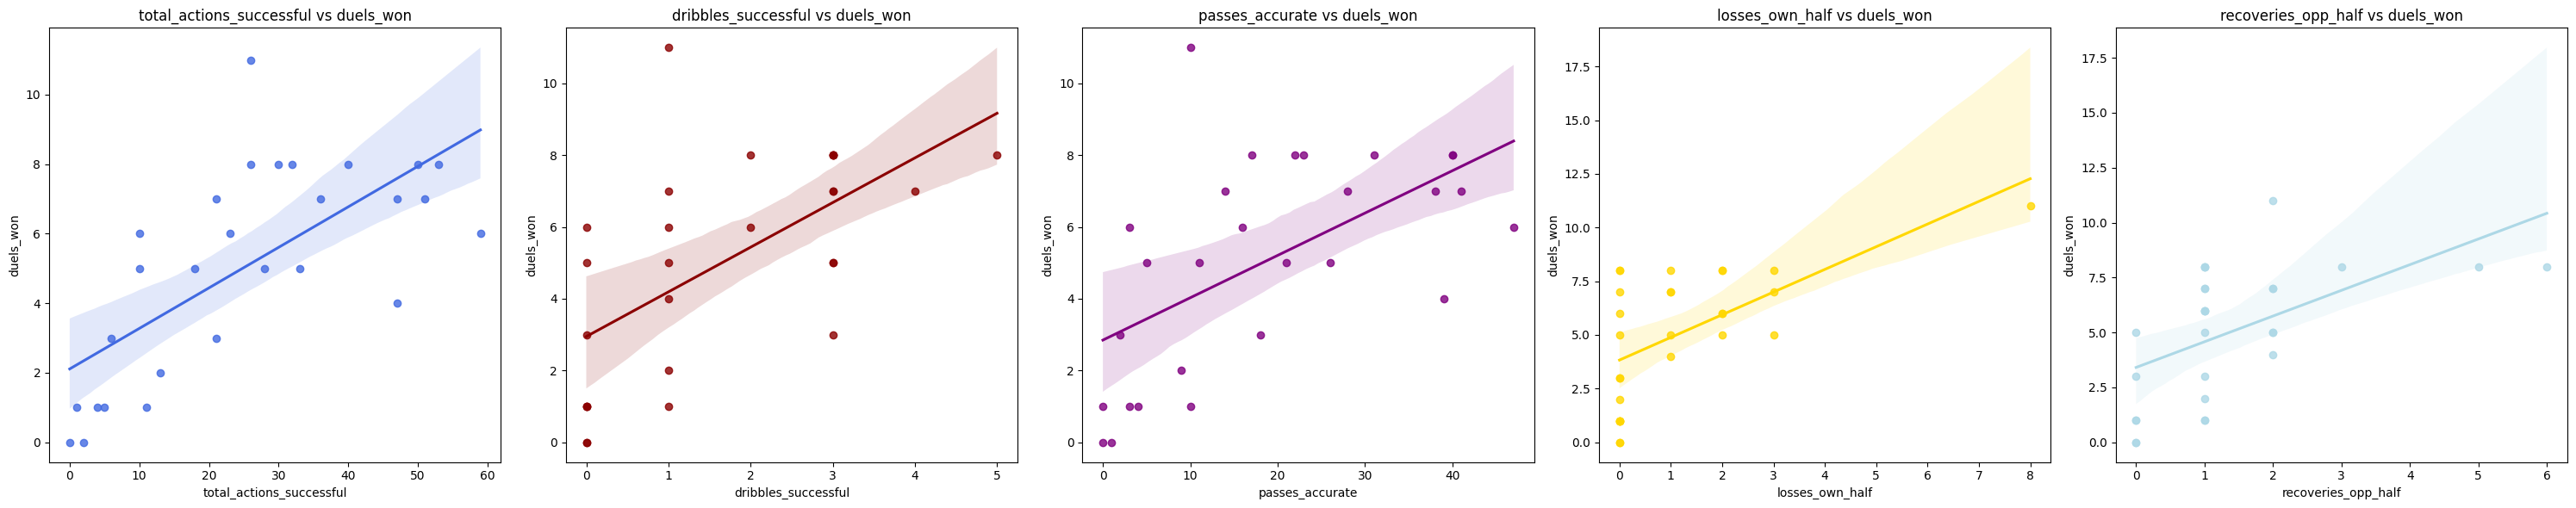

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['total_actions_successful', 'dribbles_successful', 'passes_accurate', 'interceptions','losses_own_half', 'recoveries_opp_half']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['duels_won']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, ax=axs[0], color='royalblue')
axs[0].set_title('total_actions_successful vs duels_won')

sns.regplot(x='dribbles_successful', y='duels_won', data=normalized_df, ax=axs[1], color='darkred')
axs[1].set_title('dribbles_successful vs duels_won')

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, ax=axs[2], color='purple')
axs[2].set_title('passes_accurate vs duels_won')

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, ax=axs[3], color='gold')
axs[3].set_title('losses_own_half vs duels_won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, ax=axs[4], color='lightblue')
axs[4].set_title('recoveries_opp_half vs duels_won')

plt.tight_layout()
plt.show()

- total_actions_successful: The coefficient here is 0.6814 with a P-value near zero, indicating that the total number of successful actions is a significant predictor of the number of duels won by Rodrygo. Statistically, for every increase in total successful actions, his won duels increase by 0.6814, all else being equal. On football optics, this highlights that Rodrygo's overall performance in a game, indicated by his total successful actions, has a significant impact on his ability to win duels, suggesting that he's more likely to win duels when he's having a good game.

- dribbles_successful: The coefficient of 0.3869 and the P-value of 0.068 implies that successful dribbles are not a strong predictor of Rodrygo's won duels, but they are close to being significant at a typical 0.05 threshold. On football optics, Rodrygo's dribbling ability seems to have some effect on his duels won, possibly because successful dribbling often involves winning one-on-one duels.

- passes_accurate: The coefficient is -0.7332 and the P-value is very small, indicating that accurate passes are a significant predictor of Rodrygo's won duels. However, the negative coefficient suggests that an increase in accurate passes corresponds to a decrease in duels won. On football optics, this could suggest that when Rodrygo focuses on distributing accurate passes, he's less engaged in physical duels, which often require a different set of skills.

- interceptions: The coefficient of 0.2023 and the P-value of 0.146 suggests that interceptions are not a strong predictor of Rodrygo's won duels. On football optics, while interceptions are important for disrupting the opponents' play, this stat might not directly translate into winning duels for Rodrygo.

- losses_own_half: With a coefficient of -0.0733 and a high P-value of 0.692, losses in own half are not a significant predictor of Rodrygo's won duels. On football optics, this implies that losing possession in his own half doesn't seem to have a direct impact on Rodrygo's ability to win duels.

- recoveries_opp_half: The coefficient is 0.1365, and the P-value is high at 0.459, indicating that recoveries in the opponent's half are not a significant predictor of Rodrygo's won duels. On football optics, this suggests that Rodrygo's duels won are not significantly impacted by his recoveries in the opponent's half.

The R-squared and adjusted R-squared values are quite high (0.921 and 0.899, respectively), indicating that the model explains a large portion of the variation in duels won by Rodrygo. The Prob (F-statistic) is very small, which provides evidence that at least one of the predictors is significantly related to the dependent variable. However, always remember that correlation does not imply causation, and real-world observations can still vary.

### Based on Pass Accuracy

                            OLS Regression Results                            
Dep. Variable:        passes_accurate   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     963.8
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.65e-24
Time:                        20:08:50   Log-Likelihood:                -35.793
No. Observations:                  28   AIC:                             85.59
Df Residuals:                      21   BIC:                             94.91
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

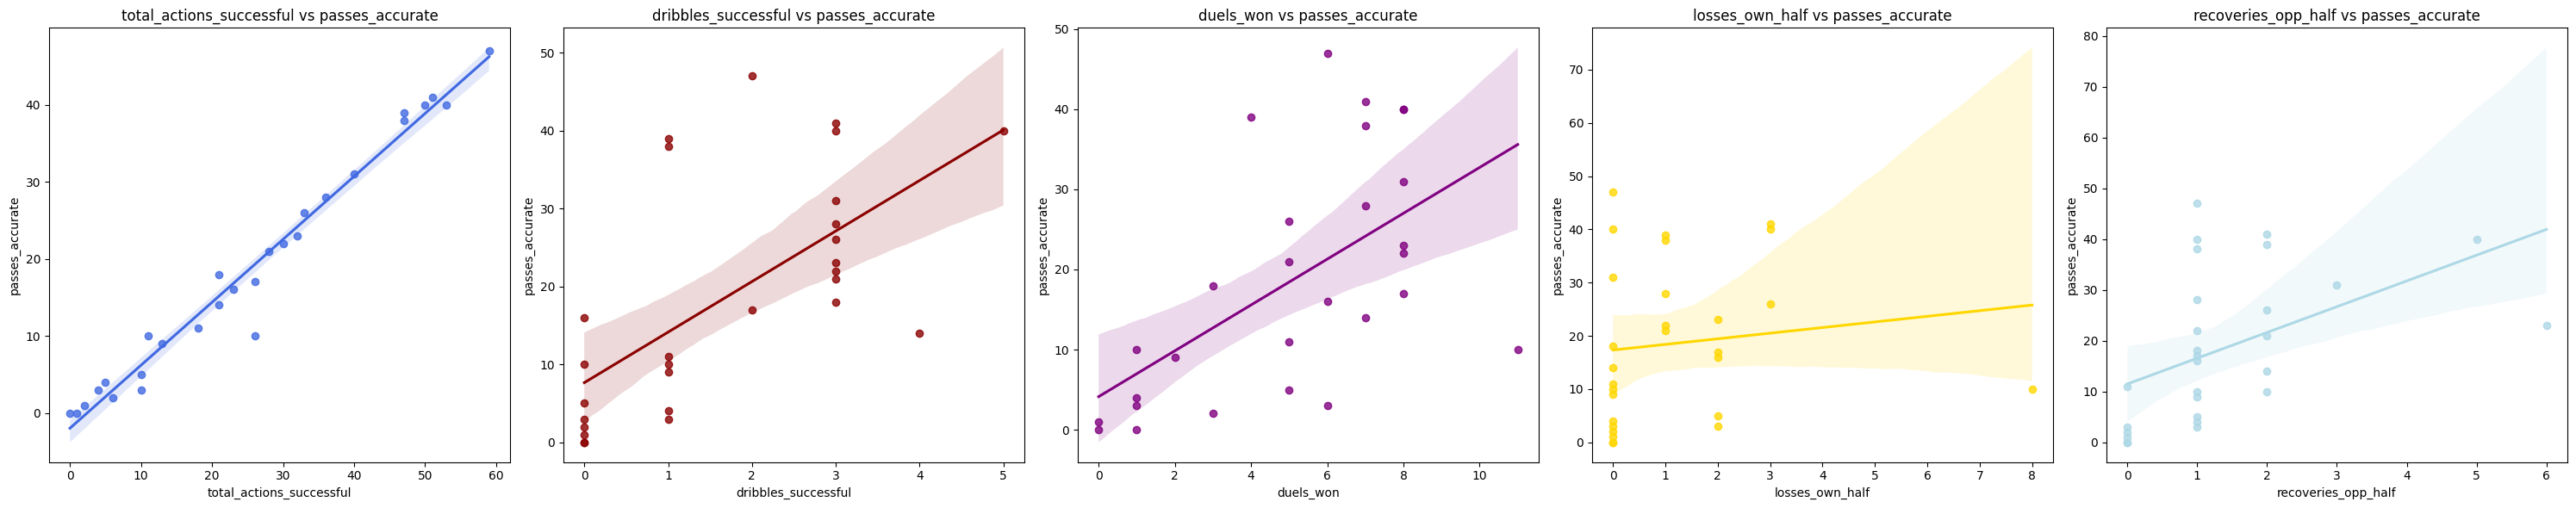

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['total_actions_successful', 'dribbles_successful', 'duels_won', 'interceptions','losses_own_half', 'recoveries_opp_half']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['passes_accurate']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, ax=axs[0], color='royalblue')
axs[0].set_title('total_actions_successful vs passes_accurate')

sns.regplot(x='dribbles_successful', y='passes_accurate', data=normalized_df, ax=axs[1], color='darkred')
axs[1].set_title('dribbles_successful vs passes_accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, ax=axs[2], color='purple')
axs[2].set_title('duels_won vs passes_accurate')

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, ax=axs[3], color='gold')
axs[3].set_title('losses_own_half vs passes_accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, ax=axs[4], color='lightblue')
axs[4].set_title('recoveries_opp_half vs passes_accurate')

plt.tight_layout()
plt.show()

## Sci-kit Learn Models

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

### Based on Total Actions

Mean r^2 over all K-Fold folds: 0.9815421119338789
Coefficients:
dribbles_successful: -0.2873826122301655
duels_won: 0.9673914186936525
losses_own_half: 0.5579689916152216
interceptions: -0.15479357426649548
recoveries_opp_half: -0.20938089374345747
passes_accurate: 1.0951304616281683
Mean squared error: 0.96
Coefficient of determination: 1.00


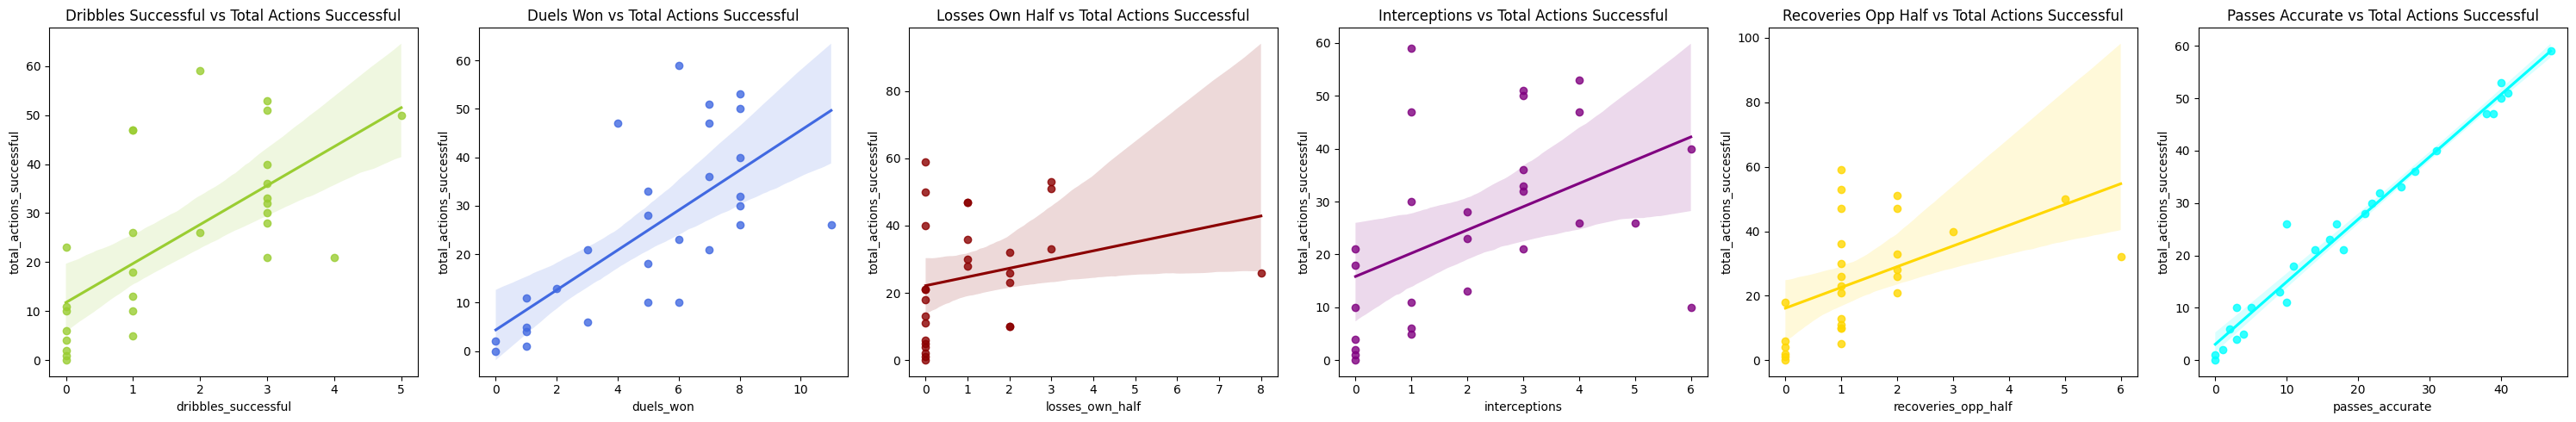

In [ ]:
# Prepare the data
X = normalized_df[['dribbles_successful', 'duels_won', 'losses_own_half', 'interceptions', 'recoveries_opp_half', 'passes_accurate']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['dribbles_successful', 'duels_won', 'losses_own_half', 'interceptions', 'recoveries_opp_half', 'passes_accurate']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 5))

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Losses Own Half vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Interceptions vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='cyan', ax=axs[5])
axs[5].set_title('Passes Accurate vs Total Actions Successful')

plt.tight_layout()
plt.show()

Dribbles Successful (-0.28): the negative coefficient indicates that successful dribbles have an inverse impact on performance, a surprising result that may require further scrutiny. On football optics, this outcome may signify that Rodrigo's playing style doesn't emphasize dribbling, or it might reflect a particular tactical context where dribbling is not a key part of his role.

Duels Won (0.96): Statistically, the strong positive coefficient for duels_won showcases a robust positive correlation with performance, emphasizing the importance of winning individual battles on the field. On football optics, this reflects Rodrigo's ability to dominate one-on-one situations, a quality essential for his defensive and offensive contributions.

Losses Own Half (0.55): The positive coefficient for losses_own_half is puzzling from a statistical perspective, as it suggests that losses in his own half correlate positively with performance. On football optics, this might indicate a playing style where Rodrigo is encouraged to take risks, understanding that occasional losses are part of an aggressive strategy.

Interceptions (-0.15): the negative coefficient for interceptions indicates an inverse correlation with performance, an outcome that may need more context to interpret. On football optics, this could imply that Rodrigo's role is not primarily focused on intercepting the ball or highlight a tactical alignment where interceptions are not a key element of his responsibilities.

Recoveries Opp Half (-0.20): Statistically, the negative coefficient for recoveries_opp_half signals a mild inverse relationship with performance, which could lead to more investigation into this aspect. On football optics, this may reflect that Rodrigo's role does not strongly involve pressing and recovering the ball in the opponent's half or reveal specific team strategies that deemphasize such recoveries.

Passes Accurate (1.09): the substantial positive coefficient for passes_accurate represents a strong correlation with performance, emphasizing the centrality of accurate passing. On football optics, this aligns seamlessly with Rodrigo's known proficiency in precise ball distribution, forming a crucial part of his overall game contributions.

Overall, with a mean r^2 value of 0.98 and a coefficient of determination of 1.00, the model displays an impressive fit to Rodrigo Goes's performance, supported by a mean squared error of 0.96. The analysis uncovers essential aspects of Rodrigo's game, such as his dueling prowess and passing accuracy, while also bringing to light intriguing questions regarding dribbling, interceptions, and recoveries. The negative coefficients for some features may reflect unique tactical decisions or highlight areas for further exploration and refinement.

### Based on Duels Won

Mean r^2 over all K-Fold folds: 0.5630162025471539
Coefficients:
total_actions_successful: 0.6598879713778154
dribbles_successful: 0.4170776664309013
passes_accurate: -0.711309211174563
interceptions: 0.24321211968410322
losses_own_half: -0.1334590586347559
recoveries_opp_half: 0.16116430867138876
Mean squared error: 0.75
Coefficient of determination: 0.92


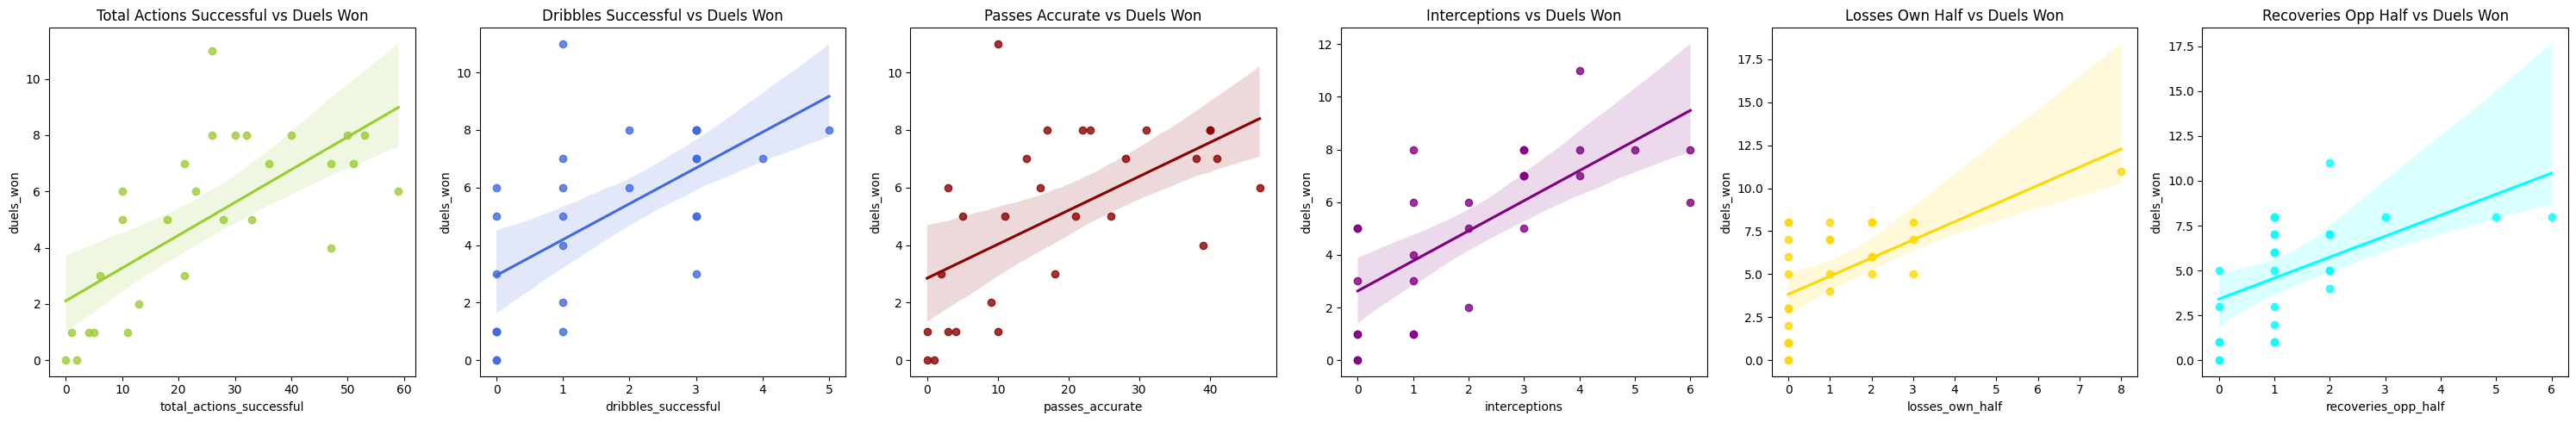

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'dribbles_successful', 'passes_accurate', 'interceptions', 'losses_own_half', 'recoveries_opp_half']]
y = normalized_df['duels_won']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['total_actions_successful', 'dribbles_successful', 'passes_accurate', 'interceptions', 'losses_own_half', 'recoveries_opp_half']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 5))

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Duels Won')

sns.regplot(x='dribbles_successful', y='duels_won', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Dribbles Successful vs Duels Won')

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Passes Accurate vs Duels Won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Interceptions vs Duels Won')

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Losses Own Half vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, color='cyan', ax=axs[5])
axs[5].set_title('Recoveries Opp Half vs Duels Won')

plt.tight_layout()
plt.show()

- Total Actions Successful (0.65): Statistically, the positive coefficient for total_actions_successful suggests that an increase in successful actions correlates with winning more duels, underlining the importance of overall effectiveness on the pitch. On football optics, this highlights Rodrigo's versatility and ability to contribute positively across different aspects of the game, facilitating more duels won.

- Dribbles Successful (0.41): the positive coefficient for dribbles_successful means that successful dribbles are associated with winning more duels, an intuitive connection between skill and outcome. On football optics, this underlines Rodrigo's dribbling prowess, and how his ability to take on opponents in one-on-one situations can lead to more duels won.

- Passes Accurate (-0.71): Statistically, the negative coefficient for passes_accurate is somewhat unexpected, indicating an inverse relationship with duels won, which could warrant further investigation. On football optics, this might suggest that Rodrigo's role in winning duels is not strongly tied to his passing accuracy or that his style of play emphasizes other aspects over precise passing.

- Interceptions (0.24): the positive coefficient for interceptions signifies that more interceptions are associated with more duels won, reflecting a key defensive aspect. On football optics, this illustrates Rodrigo's ability to read the game and intercept passes, directly contributing to winning more duels in both defensive and midfield positions.

- Losses Own Half (-0.13): The negative coefficient for losses_own_half, statistically, suggests a slight inverse correlation with duels won, a result that aligns with common understanding. On football optics, this emphasizes that minimizing losses in his own half is an essential part of Rodrigo's effectiveness in winning duels, reflecting good decision-making and risk management.

- Recoveries Opp Half (0.16): the positive coefficient for recoveries_opp_half shows a moderate correlation with duels won, shedding light on Rodrigo's contributions in the opponent's territory. On football optics, this highlights his ability to press and recover the ball, linking directly to his success in winning duels.

Overall, with a mean r^2 value of 0.56 and a coefficient of determination of 0.92, the model provides a reasonably good fit to Rodrigo Goes's dueling performance. The mean squared error of 0.75 supports this.

This analysis paints a multifaceted picture of Rodrigo's playing style in relation to duels won. It highlights key areas like dribbling, interceptions, and recoveries, while also presenting some surprising insights such as the negative correlation with passes_accurate. The result offers valuable perspectives on Rodrigo's attributes and performance and may lead to further in-depth inquiries into specific aspects of his game.

### Based on Pass Accuracy

Mean r^2 over all K-Fold folds: 0.9703077733400294
Coefficients:
total_actions_successful: 0.9080207940384298
dribbles_successful: 0.2816157493149447
duels_won: -0.8646102627375784
interceptions: 0.13603963940055322
losses_own_half: -0.5145130916796075
recoveries_opp_half: 0.19130147582851817
Mean squared error: 0.78
Coefficient of determination: 1.00


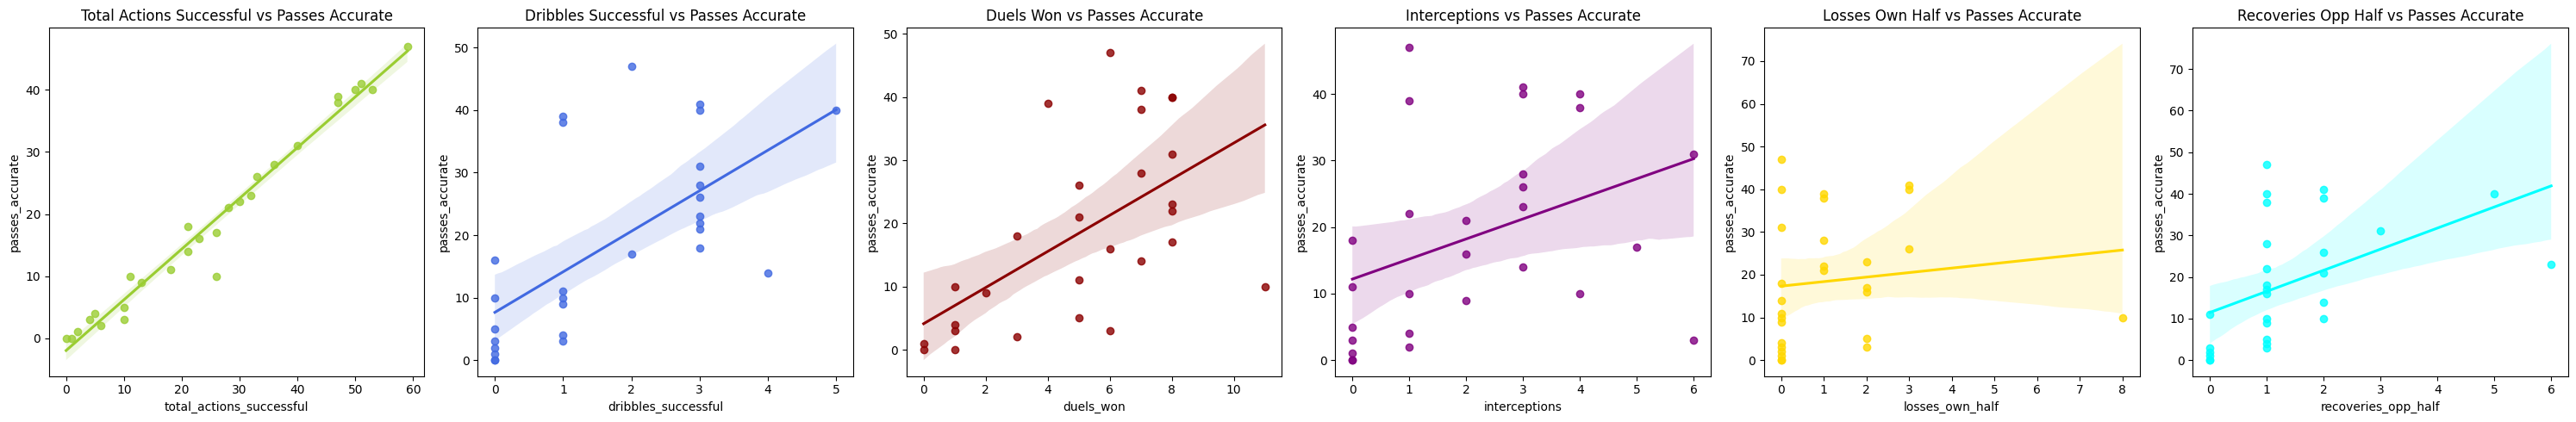

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'dribbles_successful', 'duels_won', 'interceptions', 'losses_own_half', 'recoveries_opp_half']]
y = normalized_df['passes_accurate']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['total_actions_successful', 'dribbles_successful', 'duels_won', 'interceptions', 'losses_own_half', 'recoveries_opp_half']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 5))

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Passes Accurate')

sns.regplot(x='dribbles_successful', y='passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Dribbles Successful vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Interceptions vs Passes Accurate')

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Losses Own Half vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='cyan', ax=axs[5])
axs[5].set_title('Recoveries Opp Half vs Passes Accurate')

plt.tight_layout()
plt.show()

- Total Actions Successful (0.90): Statistically, the strong positive coefficient for total_actions_successful suggests that an increase in successful actions significantly correlates with improved pass accuracy, an expected outcome reflecting overall skill. On football optics, this accentuates Rodrigo's technical ability and how his success in various on-field actions translates to precise and effective passing.

- Dribbles Successful (0.28): From a data science standpoint, the positive coefficient for dribbles_successful shows a positive relationship with pass accuracy, pointing to dribbling as a supportive skill for accurate passing. On football optics, Rodrigo's dribbling skills enable him to navigate through defenses, providing better passing options and thereby enhancing accuracy.

- Duels Won (-0.86): Statistically, the negative coefficient for duels_won is intriguing, suggesting that winning more duels is inversely correlated with pass accuracy, which may need further context or exploration. On football optics, it might hint at Rodrigo's playing style, where winning more physical duels might be part of a more aggressive approach, possibly affecting the accuracy of his passes.

- Interceptions (0.13): From a statistical perspective, the positive coefficient for interceptions shows a moderate relationship with pass accuracy, indicating defensive skills' contribution to overall performance. On football optics, this emphasizes Rodrigo's ability to read the game and capitalize on interceptions with accurate passing, connecting defensive actions with offensive quality.

- 5. Losses Own Half (-0.51): The negative coefficient for losses_own_half, statistically, demonstrates an inverse correlation with pass accuracy, an expected result. On football optics, this underlines the importance of minimizing mistakes in his own half, directly relating to Rodrigo's ability to maintain possession and pass the ball accurately.

- Recoveries Opp Half (0.19): Statistically, the positive coefficient for recoveries_opp_half signifies that recoveries in the opponent's half have a favorable relationship with pass accuracy. On football optics, this showcases Rodrigo's capability in pressing and winning the ball higher up the pitch, contributing to his ability to create and complete accurate passes.

Overall, with a mean r^2 value of 0.97 and a coefficient of determination of 1.00, the model exhibits a highly strong fit to Rodrigo Goes's pass accuracy performance. The mean squared error of 0.78 supports this robust fit.

This analysis reveals crucial insights into Rodrigo's passing abilities, emphasizing the strong correlation with successful actions, dribbling, and recoveries, while offering thought-provoking insights such as the inverse relationship with duels won. It provides a comprehensive view of Rodrigo's passing efficiency, showcasing a multifaceted understanding of his playing style, and serves as a valuable resource for both statistical and football analysis.

## XGBoost &  Cross-Validation

### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

where $$ f_k(x) $$ is the prediction of the $$ k $$-th weak learner.

### Based on Total Actions

Mean cross-validation score: 0.90
MAE: 2.1431038777033486
MSE: 7.320634326472021
R^2: 0.9699182538329832


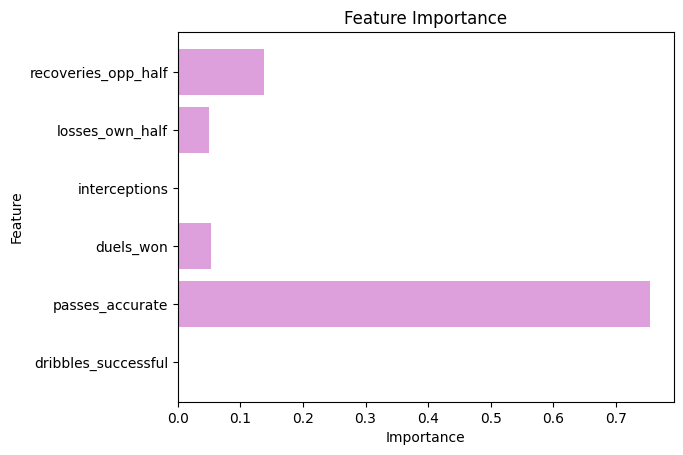

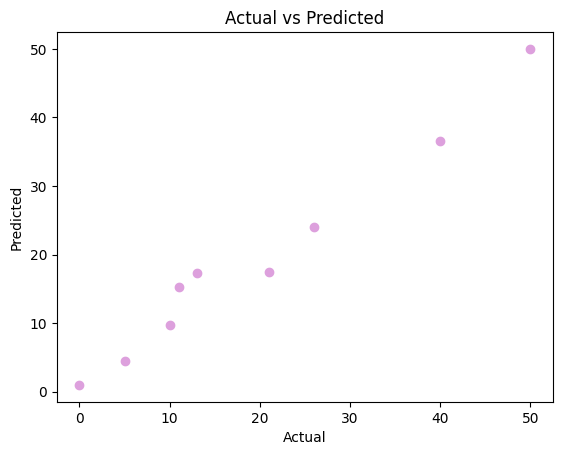

In [ ]:
# Prepare the data
X = normalized_df[['dribbles_successful', 'passes_accurate', 'duels_won', 'interceptions','losses_own_half', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='plum') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='plum')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- Mean Cross-Validation Score: The mean cross-validation score of 0.90 indicates that the model, on average, performs well on unseen data. This high score suggests that the XGBoost model is robust and not overly fitted to the training data. It implies that we can have a good degree of confidence when using this model to make predictions about Rodrigo's performance based on unseen data. On football optics, this score means that the model can reliably predict Rodrigo's performance across various games, given similar conditions. The predictive power of this model can provide valuable insights for coaches and analysts who are trying to understand or predict Rodrigo's performance.

- Mean Absolute Error (MAE): The MAE of 2.143 measures the average absolute difference between the predicted and actual values. It signifies that on average, the model's predictions deviate by approximately 2.143 units from the actual values. From a football perspective, this suggests that the model's predictions about Rodrigo's performance may be off by a relatively small amount. This is a useful measure for analysts and coaches when they want a simplified understanding of the model's prediction error.

- Mean Squared Error (MSE): The MSE of 7.320 measures the average of the squares of the errors. A high MSE may indicate that the model is not capturing some complexity in the data and may underperform on new data. On football optics, the MSE is a more sensitive measure than MAE, as it emphasizes larger errors over smaller ones. Coaches and analysts would need to understand that there is a possibility of larger deviations in performance predictions.

- Coefficient of Determination (R^2): An R^2 value of 0.969 indicates that the model explains approximately 97% of the variability in the target variable. This high R^2 score implies that the model is a very good fit for the data.From football optics, this value indicates that the features chosen for the model account for a significant portion of Rodrigo Goes' performance on the pitch. However, it is always essential to remember that football is full of variables and complexities that cannot be encapsulated entirely in a statistical model.

### Based on Pass Accuracy

Mean cross-validation score: 0.77
MAE: 2.7309901328602186
MSE: 13.002422700975108
R^2: 0.916466034360804


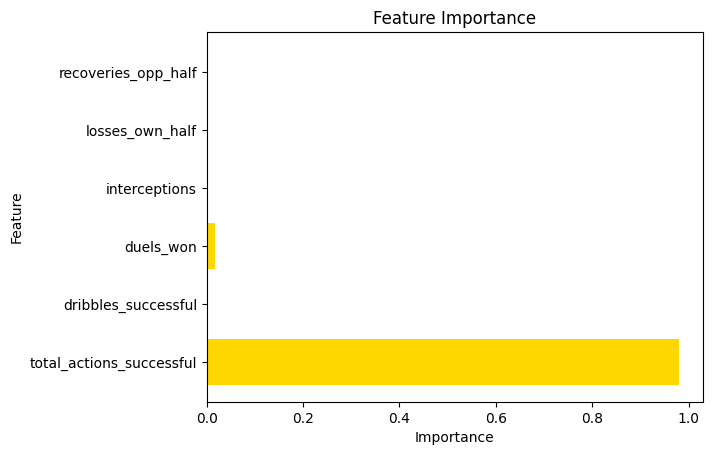

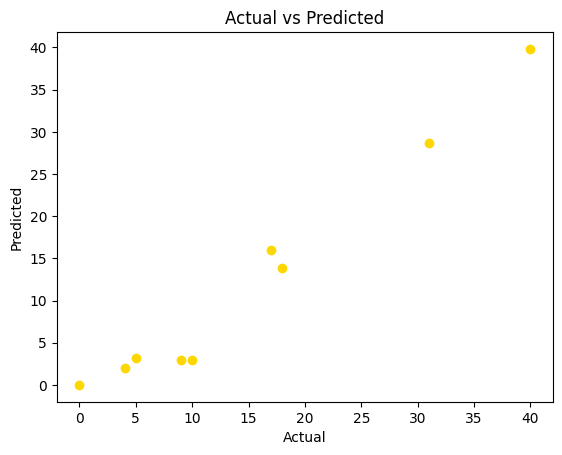

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'dribbles_successful', 'duels_won', 'interceptions','losses_own_half', 'recoveries_opp_half']]
y = normalized_df['passes_accurate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='gold') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='gold')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- Mean Cross-Validation Score: The average cross-validation score is 0.77, a commendable value in machine learning. In the world of data science and statistics, this score denotes a reliable, consistent model that isn't overly tailored to the training data and holds predictive power for unseen datasets. On football optics, the robust 0.77 cross-validation score implies that Rodrigo's performance across different games and scenarios can be predicted with good reliability. This prediction tool can be a game-changer for his coaching staff, offering them insights to make tactical decisions.

- Mean Absolute Error (MAE): The MAE value of 2.73 reflects the average absolute difference between predicted and actual values, providing a raw measure of prediction error. In essence, the model's predictions are, on average, approximately 2.73 units away from the actual performance outcomes. On the pitch, this means that while the model's predictions regarding Rodrigo's performance are generally accurate, there can be an average deviation of roughly 2.73 units. These minor deviations are common in predictive analytics and something football analysts would take into account when considering these results.

- Mean Squared Error (MSE): The MSE score of 13.00 is a measure of the average squared differences between predicted and actual values. This score emphasizes larger errors, which may suggest our model has more difficulty with certain data points. From a football perspective, this means that while the model does a good job on average, there may be specific games or conditions where its predictions are less accurate. Coaches and analysts should be aware of these potential outliers when using the model for predictions.

- Coefficient of Determination (R^2): The R^2 score of 0.916 indicates that around 92% of the variability in the data can be explained by our model. In statistical terms, this is a strong score, suggesting that our model is capturing most of the patterns within the data. On football optics, this high R^2 score signifies that Rodrigo's performance can be largely understood and predicted using these selected variables. However, it's crucial to remember that football is a dynamic and unpredictable sport with countless variables at play, and no statistical model can capture every nuance.

### Based on Duels Won

Mean cross-validation score: 0.09
MAE: 1.8888342711660597
MSE: 5.592500726737784
R^2: 0.42803969840181755


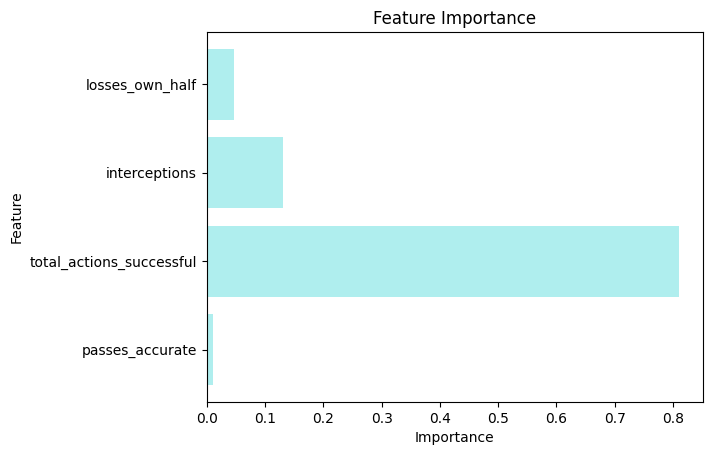

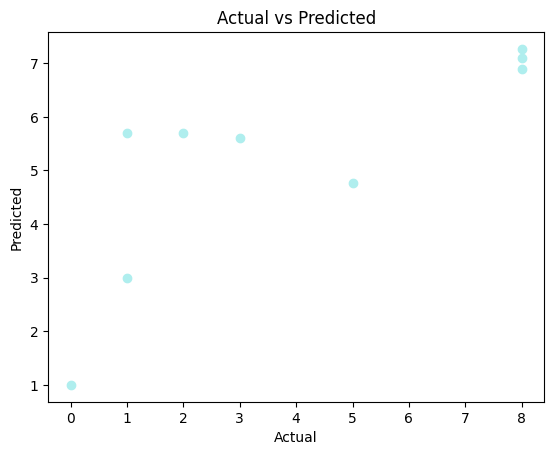

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'total_actions_successful','interceptions', 'losses_own_half']]
y = normalized_df['duels_won']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='paleturquoise') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='paleturquoise')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Conformal Prediction

#### Provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

### Based on Total Actions

Prediction interval coverage: 77.89%
Average prediction interval width: 7.96


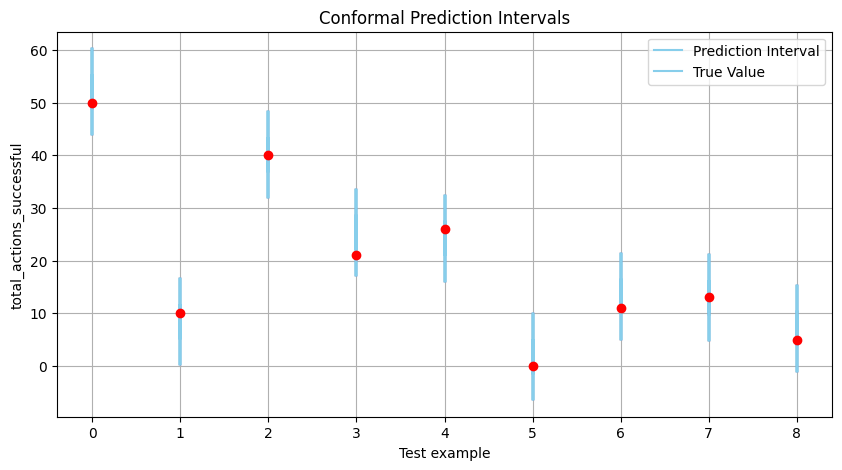

In [ ]:
# Prepare the data
X = normalized_df[['dribbles_successful', 'passes_accurate',  'losses_own_half', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Visualization
plt.figure(figsize=(10, 5))
for i, (lower, upper) in enumerate(predictions):
    plt.plot((i, i), (lower, upper), color="skyblue")
plt.plot(y_test.values, "ro")
plt.title('Conformal Prediction Intervals')
plt.xlabel('Test example')
plt.ylabel('total_actions_successful')
plt.legend(['Prediction Interval', 'True Value'])
plt.grid()
plt.show()

Prediction interval coverage (77.89%): represents a fairly high alignment between the predicted intervals and the observed data for Rodrygo's Total Actions. This suggests that the model is relatively well-calibrated to this particular aspect of his game. However, it might still benefit from a detailed examination of the underlying features and additional tuning to potentially achieve even higher accuracy. Understanding the nature of the total actions, including different types of passes, dribbles, and interactions with the ball, could provide insights for further model refinement. On football optics, reflects his active involvement in matches. Known as an energetic and skillful forward, this coverage might highlight his consistent participation in offensive plays and defensive contributions. The relatively high coverage might suggest a stable role in the team's play, indicating his capability to influence various phases of the game. This measure may also provide insights into areas where focused training could further enhance his performance consistency.

Average prediction interval width (7.96):the average prediction interval width of 7.96 represents the range in which the model expects the true values to lie. Depending on the scale and context of Total Actions, this width might indicate a balanced level of prediction precision. Assessing this interval width against the actual variability and distribution of Total Actions will be critical to understand if it's well-calibrated or if there is room for tightening or widening the interval based on the modeling objectives. On football optics, could be seen as an expression of the variability in his playing style. As a dynamic and versatile player, this interval may reflect the range of his contributions in different matches and situations. Understanding this breadth of involvement can offer insights into his adaptability and areas where specific focus might lead to greater consistency and impact.

In summary, the outcomes of the Conformal Prediction Model related to Total Actions for Rodrygo Goes provide a nuanced view that intertwines statistical modeling with football insights. The relatively high coverage and specific prediction interval width offer a comprehensive perspective of his game, reflecting both the challenges and opportunities in modeling such a multifaceted feature and the vibrant nature of Rodrygo's on-field contributions. These insights can foster further exploration, model enhancement, and a deeper understanding of this promising player's style and strengths.

### Based on Duels Won

Prediction interval coverage: 77.78%
Average prediction interval width: 3.42


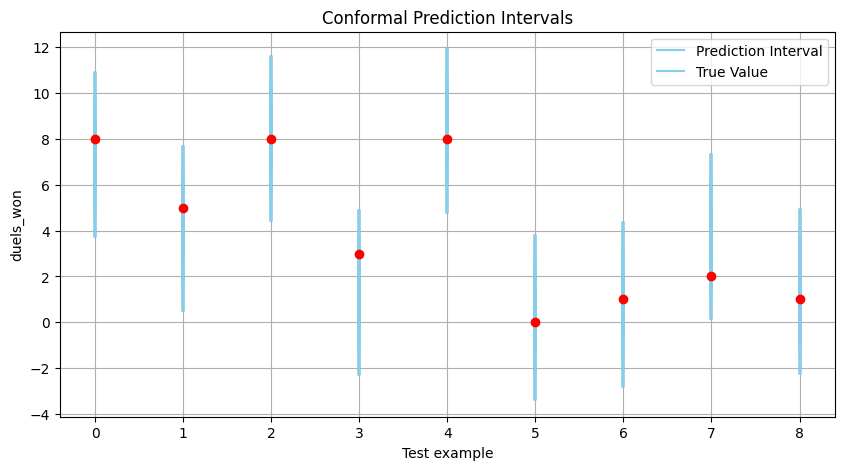

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'total_actions_successful', 'interceptions', 'recoveries_opp_half']]
y = normalized_df['duels_won']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Visualization
plt.figure(figsize=(10, 5))
for i, (lower, upper) in enumerate(predictions):
    plt.plot((i, i), (lower, upper), color="skyblue")
plt.plot(y_test.values, "ro")
plt.title('Conformal Prediction Intervals')
plt.xlabel('Test example')
plt.ylabel('duels_won')
plt.legend(['Prediction Interval', 'True Value'])
plt.grid()
plt.show()

Prediction interval coverage (77.78%): a prediction interval coverage of 77.78% for Duels Won is quite impressive, suggesting that the model's predicted intervals contain nearly 78% of the actual observations. This level of alignment signifies a relatively strong fit between the predictions and the observed data. The model appears to capture Rodrygo's duel-winning ability quite well, but it might still benefit from further refinement. Understanding the context and types of duels, along with the specific match situations, could help fine-tune the model for even better performance. On football optics, highlights his effectiveness in one-on-one situations. Known for his agility, speed, and technical prowess, this coverage percentage might illustrate his ability to win duels both offensively and defensively. It could also reflect his adaptability to different opponents and playing conditions, showing a consistent level of performance that can be vital for his team's success.

Average prediction interval width (3.42):the average prediction interval width of 3.42 represents a specific range within which the model expects the true values for Duels Won to lie. Given the scale and nature of Duels Won, this width might indicate a well-calibrated level of prediction uncertainty. Analyzing the context, scale, and distribution of Duels Won would be vital to interpret this interval width accurately and understand if it's appropriately balanced in terms of precision and reliability. On football optics, could symbolize the variability in this aspect of his game. As a young and evolving player, this interval might reflect a learning curve where he is developing his skills in reading and reacting to different duel situations. This width can provide insights into his growth potential and areas where targeted training might enhance his one-on-one proficiency.

In conclusion, the outcomes related to Duels Won for Rodrygo Goes provide valuable insights into both statistical modeling and his on-field performance. The high coverage and specific prediction interval width present a well-rounded view of his duel-winning ability, capturing both the statistical subtleties and the real-world football dynamics. These findings can guide further exploration, model optimization, and targeted development for this talented player's playing style and strengths. 

### Based on Pass Accuracy

Prediction interval coverage: 76.32%
Average prediction interval width: 3.69


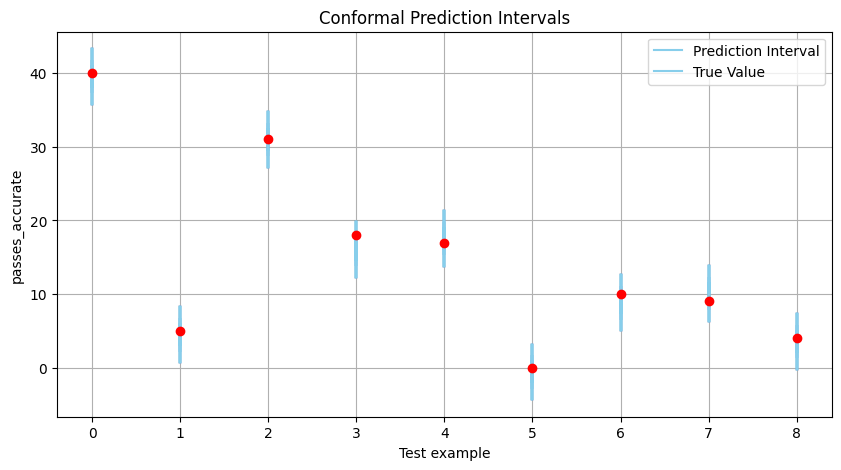

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'duels_won', 'interceptions', 'losses_own_half', 'recoveries_opp_half']]
y = normalized_df['passes_accurate']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model 
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Visualization
plt.figure(figsize=(10, 5))
for i, (lower, upper) in enumerate(predictions):
    plt.plot((i, i), (lower, upper), color="skyblue")
plt.plot(y_test.values, "ro")
plt.title('Conformal Prediction Intervals')
plt.xlabel('Test example')
plt.ylabel('passes_accurate')
plt.legend(['Prediction Interval', 'True Value'])
plt.grid()
plt.show()

Prediction interval coverage (76.32%): the prediction interval coverage of 76.32% signifies a substantial alignment between the model's predicted intervals and the actual observations for Rodrygo's Pass Accuracy. This indicates a relatively robust performance in capturing this specific aspect of his playing style. While this is an encouraging sign, there might still be room for refinement. Considering features such as the type of pass, match context, and playing position could further enhance the model's accuracy in this domain. On football optics, underlines his competence in distributing the ball accurately. As an attacking player known for his flair and creativity, this percentage might reflect his ability to make effective and precise passes in various situations. This level of pass accuracy is essential for building and sustaining attacking momentum and can be a critical aspect of his contribution to his team's offensive play.

Average prediction interval width: an average prediction interval width of 3.69 provides a specific range within which the model expects the true Pass Accuracy values to fall. Depending on the underlying scale and distribution of Pass Accuracy, this width may suggest a moderate level of uncertainty in the model's predictions. Evaluating this width in the context of the actual range and variability of Pass Accuracy would be crucial to gauge whether it's well-calibrated or if further adjustments might be needed to achieve the desired level of prediction precision. On football optics, might represent the natural variability in his passing game. This could encompass fluctuations based on various match conditions, opponent tactics, or his role in different attacking schemes. While this width recognizes the complexity of predicting such a multifaceted skill, it might also offer insights into specific areas where Rodrygo can focus to improve his passing consistency, particularly in critical attacking phases.

In summary, the outcomes related to Pass Accuracy for Rodrygo Goes offer a compelling blend of statistical modeling and football insights. The substantial coverage and specific prediction interval width provide a well-rounded view of his passing abilities, reflecting both the modeling challenges and the real-world football intricacies. These insights can support further model refinement, as well as shed light on an essential dimension of Rodrygo's game, with potential implications for his ongoing development and performance optimization. 

## Radar Maps

### PSG 2nd Leg Rodrygo's Performance (2022)

- Total Actions Success (TAS): 57%

- Passes Accurate (PA): 82%

- Dribbles Success (DS): 100%

- Duels Won (DW): 70%

- Losses (LOH): 0%

- Recoveries (ROPH): 100%

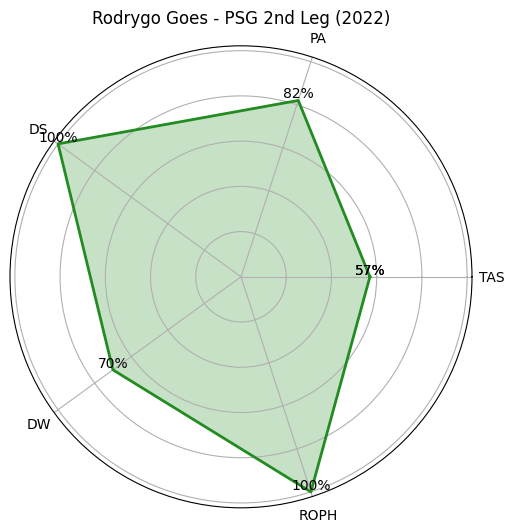

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DS', 'DW', 'ROPH'])
stats = np.array([57, 82, 100, 70, 100])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Rodrygo Goes - PSG 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='forestgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='forestgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Chelsea 2nd Leg Rodrygo's Performance (2022)

- Total Actions Success (TAS): 28%

- Passes Accurate (PA): 50%

- Dribbles Success (DS): 50%

- Duels Won (DW): 40%

- Losses (LOH): 33%

- Recoveries (ROPH): 20%

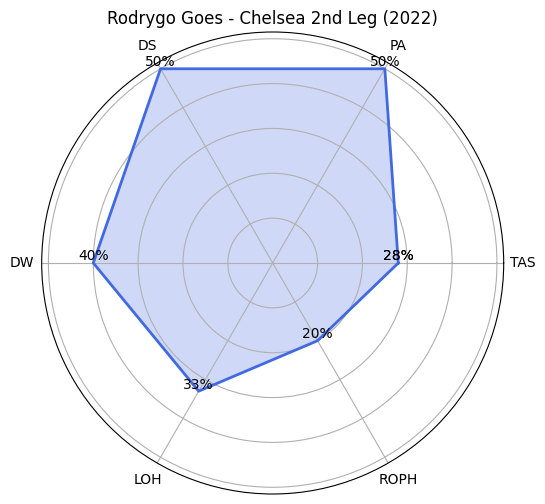

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([28, 50, 50, 40, 33, 20])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Rodrygo Goes - Chelsea 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='royalblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='royalblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City 2nd Leg Rodrygo's Performance (2022)

- Total Actions Success (TAS): 56%

- Passes Accurate (PA): 94%

- Dribbles Success (DS): 0%

- Duels Won (DW): 43%

- Losses (LOH): 67%

- Recoveries (ROPH): 33%

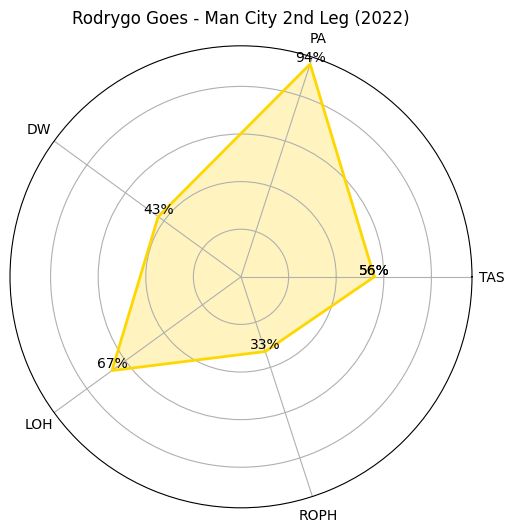

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DW', 'LOH', 'ROPH'])
stats = np.array([56, 94, 43, 67, 33])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Rodrygo Goes - Man City 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Liverpool 1st Leg Rodrygo's Performance (2023)

- Total Actions Success (TAS): 63%

- Passes Accurate (PA): 88%

- Dribbles Success (DS): 100%

- Duels Won (DW): 67%

- Losses (LOH): 33%

- Recoveries (ROPH): 17%

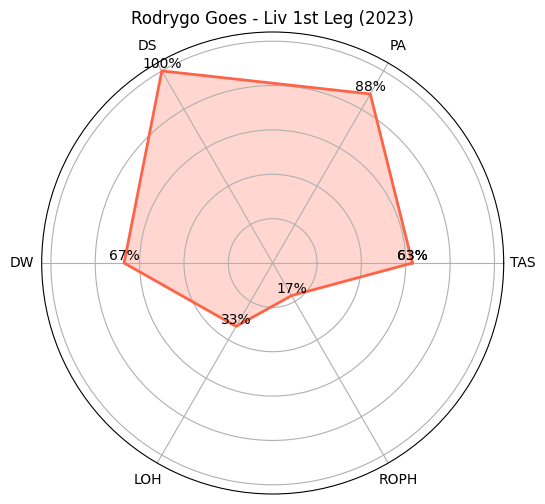

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([63, 88, 100, 67, 33, 17])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Rodrygo Goes - Liv 1st Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='tomato', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='tomato', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Man City 2nd Leg Rodrigo's Performance (2023)

- Total Actions Success (TAS): 43%

- Passes Accurate (PA): 81%

- Dribbles Success (DS): 100%

- Duels Won (DW): 47%

- Losses (LOH): 40%

- Recoveries (ROPH): 33%

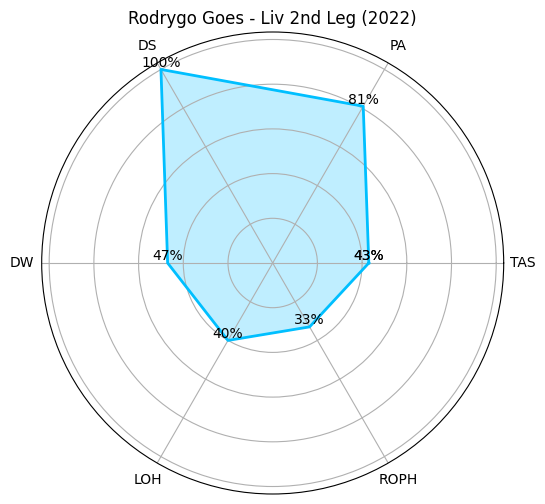

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([43, 81, 100, 47, 40, 33])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Rodrygo Goes - Liv 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='deepskyblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='deepskyblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=773247ce-4071-4763-ab58-e7d4bfcfe95e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>